In [1]:
import numpy as np
import pandas as pd
import h5py
import os
import glob
from datetime import datetime
import xarray as xr
from datetime import timedelta
from matplotlib import pyplot as plt
import matplotlib.dates as md
import warnings
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.interpolate import interp2d
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline
warnings.filterwarnings('ignore')
import scipy.ndimage as ndimage
from matplotlib import cm
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
from matplotlib.transforms import ScaledTranslation
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.colors import LogNorm
from sklearn import preprocessing

In [2]:
file_dir = 'C:/Users/taiwoajayi/Documents/SMAP/'
files_2020 = sorted(glob.glob(file_dir + '**SM_P*2023**.h5'))

In [3]:
SMAP = []
for i in range(0,len(files_2020)):
    SMAP.append(h5py.File(files_2020[i], 'r'))
i=1
SMAP

[<HDF5 file "SMAP_L3_SM_P_E_20230908_R18290_001.h5" (mode r)>,
 <HDF5 file "SMAP_L3_SM_P_E_20230909_R18290_001.h5" (mode r)>,
 <HDF5 file "SMAP_L3_SM_P_E_20230910_R18290_001.h5" (mode r)>,
 <HDF5 file "SMAP_L3_SM_P_E_20230911_R18290_001.h5" (mode r)>,
 <HDF5 file "SMAP_L3_SM_P_E_20230912_R18290_001.h5" (mode r)>,
 <HDF5 file "SMAP_L3_SM_P_E_20230913_R18290_001.h5" (mode r)>,
 <HDF5 file "SMAP_L3_SM_P_E_20230914_R18290_002.h5" (mode r)>,
 <HDF5 file "SMAP_L3_SM_P_E_20230915_R18290_002.h5" (mode r)>,
 <HDF5 file "SMAP_L3_SM_P_E_20230916_R18290_002.h5" (mode r)>,
 <HDF5 file "SMAP_L3_SM_P_E_20230917_R18290_002.h5" (mode r)>,
 <HDF5 file "SMAP_L3_SM_P_E_20230918_R18290_001.h5" (mode r)>]

In [4]:
SMAPP = np.array(SMAP[i]['Soil_Moisture_Retrieval_Data_AM'])
SMAPP

array(['EASE_column_index', 'EASE_row_index', 'albedo', 'albedo_dca',
       'albedo_scah', 'albedo_scav', 'boresight_incidence',
       'bulk_density', 'clay_fraction', 'freeze_thaw_fraction',
       'grid_surface_status', 'latitude', 'latitude_centroid',
       'longitude', 'longitude_centroid', 'radar_water_body_fraction',
       'retrieval_qual_flag', 'retrieval_qual_flag_dca',
       'retrieval_qual_flag_scah', 'retrieval_qual_flag_scav',
       'roughness_coefficient', 'roughness_coefficient_dca',
       'roughness_coefficient_scah', 'roughness_coefficient_scav',
       'soil_moisture', 'soil_moisture_dca', 'soil_moisture_error',
       'soil_moisture_scah', 'soil_moisture_scav',
       'static_water_body_fraction', 'surface_flag',
       'surface_temperature', 'surface_water_fraction_mb_h',
       'surface_water_fraction_mb_v', 'tb_3_corrected', 'tb_4_corrected',
       'tb_h_corrected', 'tb_h_uncorrected', 'tb_qual_flag_3',
       'tb_qual_flag_4', 'tb_qual_flag_h', 'tb_qual_fl

In [5]:
for i in range(11):
    length = len(np.array(SMAP[i]["Soil_Moisture_Retrieval_Data_AM"]['longitude']).flatten())
    print(f"Dataset {i + 1} length: {length}")


Dataset 1 length: 6262144
Dataset 2 length: 6262144
Dataset 3 length: 6262144
Dataset 4 length: 6262144
Dataset 5 length: 6262144
Dataset 6 length: 6262144
Dataset 7 length: 6262144
Dataset 8 length: 6262144
Dataset 9 length: 6262144
Dataset 10 length: 6262144
Dataset 11 length: 6262144


In [6]:

# Create an empty DataFrame to store the combined data
combined_df = pd.DataFrame()

# Loop through the 22 datasets and add them to the combined DataFrame
for i in range(11):
    data_dict = {
        'Latitude': np.array(SMAP[i]["Soil_Moisture_Retrieval_Data_AM"]['latitude']).flatten(),
        'Longitude': np.array(SMAP[i]["Soil_Moisture_Retrieval_Data_AM"]['longitude']).flatten(),
         'Latitude_centroid': np.array(SMAP[i]["Soil_Moisture_Retrieval_Data_AM"]['latitude_centroid']).flatten(),
        'Longitude_centroid': np.array(SMAP[i]["Soil_Moisture_Retrieval_Data_AM"]['longitude_centroid']).flatten(),
        'Soil_Moisture': np.array(SMAP[i]["Soil_Moisture_Retrieval_Data_AM"]['soil_moisture']).flatten()
        #'Soil_Moisture_error': np.array(SMAP[i]["Soil_Moisture_Retrieval_Data_AM"]['soil_moisture_error']).flatten()
    }

    # Replace -9999 with -99999 in the data
    
    # Create a temporary DataFrame for the current dataset
    temp_df = pd.DataFrame(data_dict)
    
    # Add the temporary DataFrame to the combined DataFrame
    combined_df = pd.concat([combined_df, temp_df], axis=0, ignore_index=True)


combined_df


Latitude   Longitude  Latitude_centroid  Longitude_centroid   
0         84.656418 -179.953323          84.656418         -179.953323  \
1         84.656418 -179.859955          84.656418         -179.859955   
2         84.656418 -179.766602          84.656418         -179.766602   
3         84.656418 -179.673233          84.656418         -179.673233   
4         84.656418 -179.579880          84.656418         -179.579880   
...             ...         ...                ...                 ...   
68883579 -84.656418  179.579880         -84.656418          179.579880   
68883580 -84.656418  179.673233         -84.656418          179.673233   
68883581 -84.656418  179.766602         -84.656418          179.766602   
68883582 -84.656418  179.859955         -84.656418          179.859955   
68883583 -84.656418  179.953323         -84.656418          179.953323   

          Soil_Moisture  
0               -9999.0  
1               -9999.0  
2               -9999.0  
3               -9999.0  
4               -9999.0  
...                 ...  
68883579        -9999.0  
68883580        -9999.0  
68883581        -9999.0  
68883582        -9999.0  
68883583        -9999.0  

[68883584 rows x 5 columns]

In [7]:

# Create an empty DataFrame to store the combined data
combined_dff = pd.DataFrame()

# Loop through the 22 datasets and add them to the combined DataFrame
for i in range(11):
    data_dictt = {
        'Latitude': np.array(SMAP[i]["Soil_Moisture_Retrieval_Data_PM"]['latitude_pm']).flatten(),
        'Longitude': np.array(SMAP[i]["Soil_Moisture_Retrieval_Data_PM"]['longitude_pm']).flatten(),
         'Latitude_centroid': np.array(SMAP[i]["Soil_Moisture_Retrieval_Data_PM"]['latitude_centroid_pm']).flatten(),
        'Longitude_centroid': np.array(SMAP[i]["Soil_Moisture_Retrieval_Data_PM"]['longitude_centroid_pm']).flatten(),
        'Soil_Moisture': np.array(SMAP[i]["Soil_Moisture_Retrieval_Data_PM"]['soil_moisture_pm']).flatten()
        #'Soil_Moisture_error': np.array(SMAP[i]["Soil_Moisture_Retrieval_Data_AM"]['soil_moisture_error']).flatten()
    }

    # Replace -9999 with -99999 in the data
    
    # Create a temporary DataFrame for the current dataset
    temp_dff = pd.DataFrame(data_dictt)
    
    # Add the temporary DataFrame to the combined DataFrame
    combined_dff = pd.concat([combined_dff, temp_dff], axis=0, ignore_index=True)


combined_dff


Latitude   Longitude  Latitude_centroid  Longitude_centroid   
0         84.656418 -179.953323          84.656418         -179.953323  \
1         84.656418 -179.859955          84.656418         -179.859955   
2         84.656418 -179.766602          84.656418         -179.766602   
3         84.656418 -179.673233          84.656418         -179.673233   
4         84.656418 -179.579880          84.656418         -179.579880   
...             ...         ...                ...                 ...   
68883579 -84.656418  179.579880         -84.656418          179.579880   
68883580 -84.656418  179.673233         -84.656418          179.673233   
68883581 -84.656418  179.766602         -84.656418          179.766602   
68883582 -84.656418  179.859955         -84.656418          179.859955   
68883583 -84.656418  179.953323         -84.656418          179.953323   

          Soil_Moisture  
0               -9999.0  
1               -9999.0  
2               -9999.0  
3               -9999.0  
4               -9999.0  
...                 ...  
68883579        -9999.0  
68883580        -9999.0  
68883581        -9999.0  
68883582        -9999.0  
68883583        -9999.0  

[68883584 rows x 5 columns]

In [8]:

# Create an empty DataFrame to store the combined data
combined_merged_df_with_dates = pd.DataFrame()

# Loop through the 22 datasets and add them to the combined DataFrame
for i in range(11):
    data_dict2 = {
        'Latitude': np.array(SMAP[i]["Soil_Moisture_Retrieval_Data_AM"]['latitude']).flatten(),
        'Longitude': np.array(SMAP[i]["Soil_Moisture_Retrieval_Data_AM"]['longitude']).flatten(),
         'Latitude_centroid': np.array(SMAP[i]["Soil_Moisture_Retrieval_Data_AM"]['latitude_centroid']).flatten(),
        'Longitude_centroid': np.array(SMAP[i]["Soil_Moisture_Retrieval_Data_AM"]['longitude_centroid']).flatten(),
        'retrieval': np.array(SMAP[i]["Soil_Moisture_Retrieval_Data_AM"]['retrieval_qual_flag']).flatten()
    }

    # Replace -9999 with -99999 in the data
    
    # Create a temporary DataFrame for the current dataset
    temp_merged_df_with_dates = pd.DataFrame(data_dict2)
    
    # Add the temporary DataFrame to the combined DataFrame
    combined_merged_df_with_dates = pd.concat([combined_merged_df_with_dates, temp_merged_df_with_dates], axis=0, ignore_index=True)


combined_merged_df_with_dates


Latitude   Longitude  Latitude_centroid  Longitude_centroid   
0         84.656418 -179.953323          84.656418         -179.953323  \
1         84.656418 -179.859955          84.656418         -179.859955   
2         84.656418 -179.766602          84.656418         -179.766602   
3         84.656418 -179.673233          84.656418         -179.673233   
4         84.656418 -179.579880          84.656418         -179.579880   
...             ...         ...                ...                 ...   
68883579 -84.656418  179.579880         -84.656418          179.579880   
68883580 -84.656418  179.673233         -84.656418          179.673233   
68883581 -84.656418  179.766602         -84.656418          179.766602   
68883582 -84.656418  179.859955         -84.656418          179.859955   
68883583 -84.656418  179.953323         -84.656418          179.953323   

          retrieval  
0                15  
1                15  
2                15  
3                15  
4                15  
...             ...  
68883579         15  
68883580         15  
68883581         15  
68883582         15  
68883583         15  

[68883584 rows x 5 columns]

In [9]:
# Number of rows per individual HDF5 file
rows_per_file = 6262144

# Total number of rows in the merged DataFrame
total_num_rows = 68883584

# Create a date range with the same total number of rows
start_date = '2023-09-08'  # Replace with the start date you want
end_date = '2023-09-18'  # Replace with the end date you want
dates_per_file = total_num_rows // rows_per_file  # Number of dates needed
date_range = pd.date_range(start=start_date, periods=dates_per_file, freq='D')

# Repeat each date for the respective number of rows
dates = np.repeat(date_range, rows_per_file)

# Create a DataFrame with the dates and merge it with your original data
dates_df = pd.DataFrame({'Date': dates})

# Assuming you have a merged DataFrame named merged_df
merged_df_with_dates = pd.concat([dates_df, combined_df], axis=1)

# Now, merged_df_with_dates contains dates in the first column, and the rest of the columns from your original merged HDF5 files DataFrame.

# Display the DataFrame
merged_df_with_dates


Date   Latitude   Longitude  Latitude_centroid   
0        2023-09-08  84.656418 -179.953323          84.656418  \
1        2023-09-08  84.656418 -179.859955          84.656418   
2        2023-09-08  84.656418 -179.766602          84.656418   
3        2023-09-08  84.656418 -179.673233          84.656418   
4        2023-09-08  84.656418 -179.579880          84.656418   
...             ...        ...         ...                ...   
68883579 2023-09-18 -84.656418  179.579880         -84.656418   
68883580 2023-09-18 -84.656418  179.673233         -84.656418   
68883581 2023-09-18 -84.656418  179.766602         -84.656418   
68883582 2023-09-18 -84.656418  179.859955         -84.656418   
68883583 2023-09-18 -84.656418  179.953323         -84.656418   

          Longitude_centroid  Soil_Moisture  
0                -179.953323        -9999.0  
1                -179.859955        -9999.0  
2                -179.766602        -9999.0  
3                -179.673233        -9999.0  
4                -179.579880        -9999.0  
...                      ...            ...  
68883579          179.579880        -9999.0  
68883580          179.673233        -9999.0  
68883581          179.766602        -9999.0  
68883582          179.859955        -9999.0  
68883583          179.953323        -9999.0  

[68883584 rows x 6 columns]

In [10]:
# Number of rows per individual HDF5 file
rows_per_file = 6262144

# Total number of rows in the merged DataFrame
total_num_rows = 68883584

# Create a date range with the same total number of rows
start_date = '2023-09-08'  # Replace with the start date you want
end_date = '2023-09-18'  # Replace with the end date you want
dates_per_file = total_num_rows // rows_per_file  # Number of dates needed
date_range = pd.date_range(start=start_date, periods=dates_per_file, freq='D')

# Repeat each date for the respective number of rows
dates = np.repeat(date_range, rows_per_file)

# Create a DataFrame with the dates and merge it with your original data
dates_df = pd.DataFrame({'Date': dates})

# Assuming you have a merged DataFrame named merged_df
merged_dff_with_dates = pd.concat([dates_df, combined_dff], axis=1)

# Now, merged_df_with_dates contains dates in the first column, and the rest of the columns from your original merged HDF5 files DataFrame.

# Display the DataFrame
merged_dff_with_dates


Date   Latitude   Longitude  Latitude_centroid   
0        2023-09-08  84.656418 -179.953323          84.656418  \
1        2023-09-08  84.656418 -179.859955          84.656418   
2        2023-09-08  84.656418 -179.766602          84.656418   
3        2023-09-08  84.656418 -179.673233          84.656418   
4        2023-09-08  84.656418 -179.579880          84.656418   
...             ...        ...         ...                ...   
68883579 2023-09-18 -84.656418  179.579880         -84.656418   
68883580 2023-09-18 -84.656418  179.673233         -84.656418   
68883581 2023-09-18 -84.656418  179.766602         -84.656418   
68883582 2023-09-18 -84.656418  179.859955         -84.656418   
68883583 2023-09-18 -84.656418  179.953323         -84.656418   

          Longitude_centroid  Soil_Moisture  
0                -179.953323        -9999.0  
1                -179.859955        -9999.0  
2                -179.766602        -9999.0  
3                -179.673233        -9999.0  
4                -179.579880        -9999.0  
...                      ...            ...  
68883579          179.579880        -9999.0  
68883580          179.673233        -9999.0  
68883581          179.766602        -9999.0  
68883582          179.859955        -9999.0  
68883583          179.953323        -9999.0  

[68883584 rows x 6 columns]

In [11]:
merged_df_with_dates = merged_df_with_dates.replace(-9999, np.NaN)
merged_df_with_dates = merged_df_with_dates.dropna()
merged_df_with_dates



Date   Latitude  Longitude  Latitude_centroid   
31750    2023-09-08  80.375343 -95.741699          80.375343  \
31751    2023-09-08  80.375343 -95.648338          80.375343   
31752    2023-09-08  80.375343 -95.554977          80.375343   
31753    2023-09-08  80.375343 -95.461617          80.375343   
31754    2023-09-08  80.375343 -95.368256          80.375343   
...             ...        ...        ...                ...   
68333371 2023-09-18 -55.345085 -68.386932         -55.345085   
68333372 2023-09-18 -55.345085 -68.293571         -55.345085   
68337223 2023-09-18 -55.468330 -68.760376         -55.468330   
68337224 2023-09-18 -55.468330 -68.667015         -55.468330   
68337225 2023-09-18 -55.468330 -68.573654         -55.468330   

          Longitude_centroid  Soil_Moisture  
31750             -95.741699       0.257332  
31751             -95.648338       0.253935  
31752             -95.554977       0.256170  
31753             -95.461617       0.259091  
31754             -95.368256       0.258263  
...                      ...            ...  
68333371          -68.386932       0.521069  
68333372          -68.293571       0.516848  
68337223          -68.760376       0.511757  
68337224          -68.667015       0.517577  
68337225          -68.573654       0.543116  

[8634028 rows x 6 columns]

In [12]:
# Create an empty list to store the NumPy arrays
cocococo_data = []

# Loop through the 22 datasets and add them to the list
for i in range(11):
    data = np.array(SMAP[i]["Soil_Moisture_Retrieval_Data_AM"]['longitude'])
     # Replace 9999 with NaN
    data = np.where(data == -9999, np.nan, data)
    cocococo_data.append(data)

# Concatenate the NumPy arrays into a single array
comb = np.array(cocococo_data)
max_value2 = np.nanmax(comb, axis=0)
max_value2.shape


(1624, 3856)

In [13]:
# Create an empty list to store the NumPy arrays
cococo_data = []

# Loop through the 22 datasets and add them to the list
for i in range(11):
    data = np.array(SMAP[i]["Soil_Moisture_Retrieval_Data_AM"]['latitude'])
     # Replace 9999 with NaN
    data = np.where(data == -9999, np.nan, data)
    cococo_data.append(data)

# Concatenate the NumPy arrays into a single array
combined = np.array(cococo_data)
combined
# Calculate the maximum value along axis 0
max_value = np.nanmax(combined, axis=0)
max_value.shape

# Display the combined NumPy array


(1624, 3856)

In [14]:
# Create an empty list to store the NumPy arrays
coco_data = []

# Loop through the 22 datasets and add them to the list
for i in range(11):
    data = np.array(SMAP[i]["Soil_Moisture_Retrieval_Data_AM"]['soil_moisture'])
     # Replace 9999 with NaN
    data = np.where(data == -9999, np.nan, data)
    coco_data.append(data)

# Concatenate the NumPy arrays into a single array
combined_array = np.array(coco_data)
combined_array.shape

# Display the combined NumPy array


(11, 1624, 3856)

In [102]:
coco_data[0].shape

(1624, 3856)

In [15]:
# Calculate the standard deviation while ignoring NaN values
std_deviation = np.nanstd(combined_array,axis=0)
std_deviation.shape

(1624, 3856)

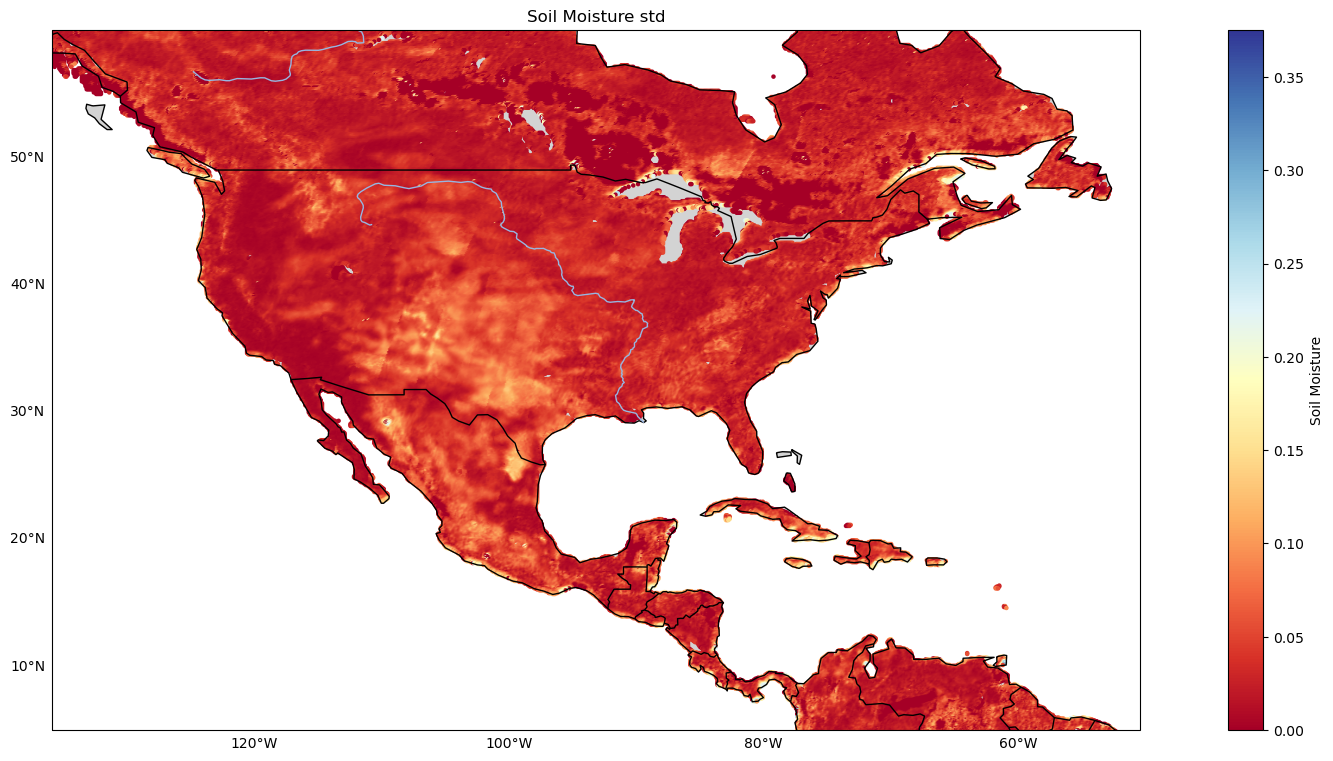

In [16]:
# Create a figure and an axes with a specific projection
fig = plt.figure(figsize=(50, 20))
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())

# Customize the map projection and extent
ax.set_extent([-135.9, -50.4, 5, 60], crs=ccrs.PlateCarree())
ax.coastlines()

# Add additional map features, such as rivers, borders, or land color
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Optionally, plot data or markers on the map
#plt.scatter(x, y, c=colors, cmap='RdBu', s=100)
sc = ax.scatter(max_value2, max_value, c=std_deviation, cmap='RdYlBu', s=5, transform=ccrs.PlateCarree())
#ax.plot(traj_all2_subset['Longitude'], traj_all2_subset['Latitude'], c=traj_all2_subset['Launch_Altitude_AGL_m'], cmap='RdYlBu ', transform=ccrs.PlateCarree())  # Example marker
cbar = plt.colorbar(sc)
cbar.set_label('Soil Moisture')
# Set gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
# Add a star marker for a single point
# Set the title of the map
ax.set_title('Soil Moisture stdev')

# Show the map
plt.show()

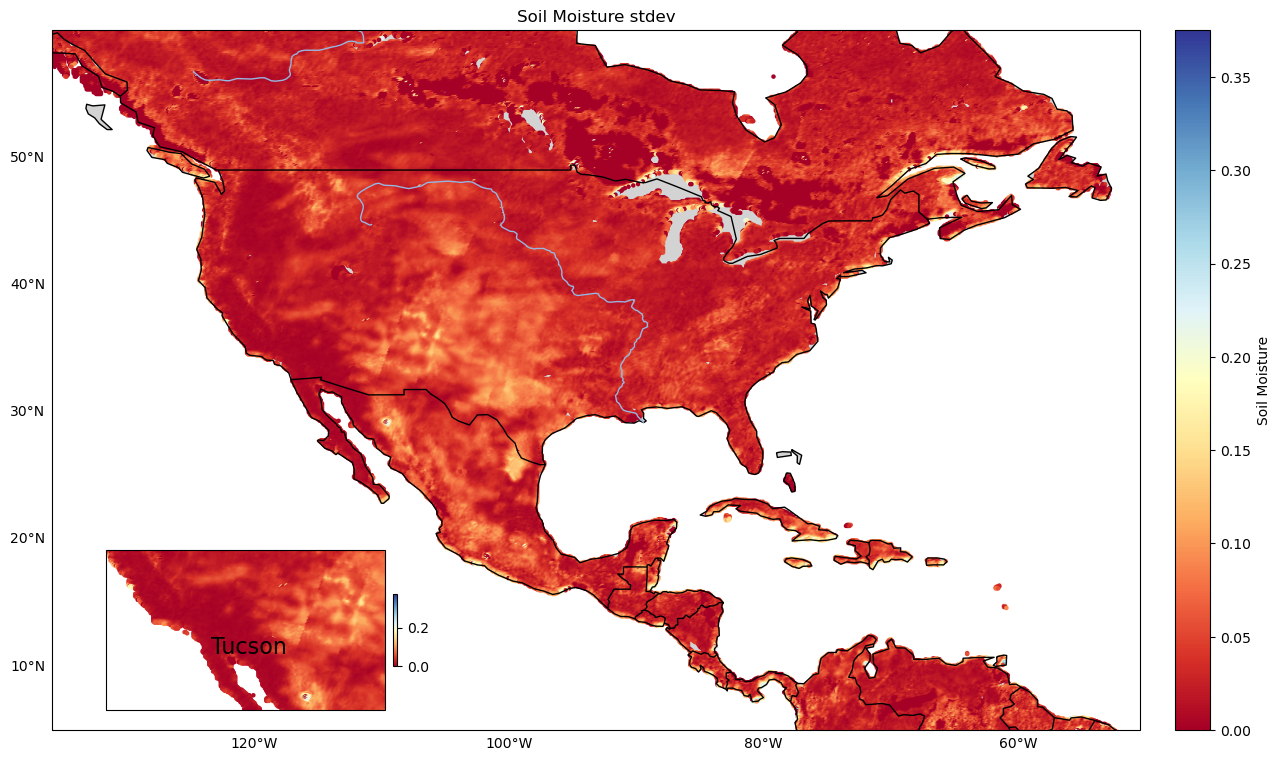

In [61]:
# Create a figure and an axes with a specific projection

data = {
    'Latitude': [32.2540],
    'Longitude': [-110.9742],
    'Label': ['Tucson'],
}

fig = plt.figure(figsize=(50, 20))
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())

# Customize the map projection and extent
ax.set_extent([-135.9, -50.4, 5, 60], crs=ccrs.PlateCarree())
ax.coastlines()

# Add additional map features, such as rivers, borders, or land color
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')


axins.add_feature(cfeature.LAND, facecolor='lightgray')
axins.add_feature(cfeature.COASTLINE, linewidth=0.5)
# Add land and coastlines to the map
axins.add_feature(cfeature.RIVERS)
axins.add_feature(cfeature.OCEAN)

# Define the coordinates for the inset map's extent
inset_extent = [-124, -103.9, 28.23588, 39.73782]

# Create an inset_axes in the lower left corner of the main map
axins = plt.axes([0.20, 0.54, 0.08, 0.08], projection=ccrs.PlateCarree())

# Set the extent of the inset map to focus on Bermuda
axins.set_extent(inset_extent, crs=ccrs.PlateCarree())
# Plot Tudor Hill on the main map
sc2 = axins.scatter(max_value2, max_value, c=std_deviation, cmap='RdYlBu', s=5, transform=ccrs.PlateCarree())

# Optionally, plot data or markers on the map
#plt.scatter(x, y, c=colors, cmap='RdBu', s=100)
sc = ax.scatter(max_value2, max_value, c=std_deviation, cmap='RdYlBu', s=5, transform=ccrs.PlateCarree())
#ax.plot(traj_all2_subset['Longitude'], traj_all2_subset['Latitude'], c=traj_all2_subset['Launch_Altitude_AGL_m'], cmap='RdYlBu ', transform=ccrs.PlateCarree())  # Example marker
# Annotate the point with the name
for x, y, label in zip(data['Longitude'], data['Latitude'], data['Label']):
    plt.text(x, y, label, fontsize=16, ha='right', color='black', zorder = 50)
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', label='Soil Moisture', pad = 0.02)
cbar = plt.colorbar(sc2, ax=axins, orientation='vertical', pad = 0.02, shrink = 0.45)
#cbar.set_label('Soil Moisture')
# Set gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
# Add a star marker for a single point
# Set the title of the map
ax.set_title('Soil Moisture stdev')

# Show the map
plt.show()



In [17]:
combined_merged_df_with_dates = combined_merged_df_with_dates.replace(-9999, np.NaN)
combined_merged_df_with_dates = combined_merged_df_with_dates.dropna()
combined_merged_df_with_dates

Latitude   Longitude  Latitude_centroid  Longitude_centroid   
0         84.656418 -179.953323          84.656418         -179.953323  \
1         84.656418 -179.859955          84.656418         -179.859955   
2         84.656418 -179.766602          84.656418         -179.766602   
3         84.656418 -179.673233          84.656418         -179.673233   
4         84.656418 -179.579880          84.656418         -179.579880   
...             ...         ...                ...                 ...   
68883579 -84.656418  179.579880         -84.656418          179.579880   
68883580 -84.656418  179.673233         -84.656418          179.673233   
68883581 -84.656418  179.766602         -84.656418          179.766602   
68883582 -84.656418  179.859955         -84.656418          179.859955   
68883583 -84.656418  179.953323         -84.656418          179.953323   

          retrieval  
0                15  
1                15  
2                15  
3                15  
4                15  
...             ...  
68883579         15  
68883580         15  
68883581         15  
68883582         15  
68883583         15  

[34612056 rows x 5 columns]

In [18]:
merged_dff_with_dates = merged_dff_with_dates.replace(-9999, np.NaN)
merged_dff_with_dates = merged_dff_with_dates.dropna()
merged_dff_with_dates

Date   Latitude   Longitude  Latitude_centroid   
31750    2023-09-08  80.375343  -95.741699          80.375343  \
31751    2023-09-08  80.375343  -95.648338          80.375343   
31752    2023-09-08  80.375343  -95.554977          80.375343   
31753    2023-09-08  80.375343  -95.461617          80.375343   
31754    2023-09-08  80.375343  -95.368256          80.375343   
...             ...        ...         ...                ...   
67826993 2023-09-18 -41.385147  175.658707         -41.385147   
67830845 2023-09-18 -41.478775  175.285263         -41.478775   
67830846 2023-09-18 -41.478775  175.378632         -41.478775   
67830847 2023-09-18 -41.478775  175.471985         -41.478775   
67830848 2023-09-18 -41.478775  175.565353         -41.478775   

          Longitude_centroid  Soil_Moisture  
31750             -95.741699       0.258914  
31751             -95.648338       0.241803  
31752             -95.554977       0.243151  
31753             -95.461617       0.260484  
31754             -95.368256       0.256996  
...                      ...            ...  
67826993          175.658707       0.596944  
67830845          175.285263       0.609399  
67830846          175.378632       0.605878  
67830847          175.471985       0.599981  
67830848          175.565353       0.596115  

[8352393 rows x 6 columns]

In [19]:
# Assuming you have a DataFrame named combined_df
start_date = '2023-09-08'
end_date = '2023-09-12'

# Use boolean indexing to extract rows within the specified date range
extracted_rows = merged_df_with_dates[(merged_df_with_dates['Date'] >= start_date) & (merged_df_with_dates['Date'] <= end_date)]

# Display the extracted rows
extracted_rows


Date   Latitude  Longitude  Latitude_centroid   
31750    2023-09-08  80.375343 -95.741699          80.375343  \
31751    2023-09-08  80.375343 -95.648338          80.375343   
31752    2023-09-08  80.375343 -95.554977          80.375343   
31753    2023-09-08  80.375343 -95.461617          80.375343   
31754    2023-09-08  80.375343 -95.368256          80.375343   
...             ...        ...        ...                ...   
30721908 2023-09-12 -54.132839 -72.028008         -54.132839   
30721909 2023-09-12 -54.132839 -71.934647         -54.132839   
30721910 2023-09-12 -54.132839 -71.841286         -54.132839   
30725764 2023-09-12 -54.252468 -72.028008         -54.252468   
30725765 2023-09-12 -54.252468 -71.934647         -54.252468   

          Longitude_centroid  Soil_Moisture  
31750             -95.741699       0.257332  
31751             -95.648338       0.253935  
31752             -95.554977       0.256170  
31753             -95.461617       0.259091  
31754             -95.368256       0.258263  
...                      ...            ...  
30721908          -72.028008       0.671145  
30721909          -71.934647       0.665824  
30721910          -71.841286       0.665428  
30725764          -72.028008       0.673958  
30725765          -71.934647       0.672614  

[4068145 rows x 6 columns]

In [20]:
# Assuming you have a DataFrame named combined_df
start_date = '2023-09-08'
end_date = '2023-09-12'

# Use boolean indexing to extract rows within the specified date range
extractedd_rows = merged_dff_with_dates[(merged_dff_with_dates['Date'] >= start_date) & (merged_dff_with_dates['Date'] <= end_date)]

# Display the extracted rows
extractedd_rows


Date   Latitude  Longitude  Latitude_centroid   
31750    2023-09-08  80.375343 -95.741699          80.375343  \
31751    2023-09-08  80.375343 -95.648338          80.375343   
31752    2023-09-08  80.375343 -95.554977          80.375343   
31753    2023-09-08  80.375343 -95.461617          80.375343   
31754    2023-09-08  80.375343 -95.368256          80.375343   
...             ...        ...        ...                ...   
30656480 2023-09-12 -52.148716 -60.451244         -52.148716   
30656490 2023-09-12 -52.148716 -59.517635         -52.148716   
30656491 2023-09-12 -52.148716 -59.424274         -52.148716   
30656492 2023-09-12 -52.148716 -59.330914         -52.148716   
30656493 2023-09-12 -52.148716 -59.237553         -52.148716   

          Longitude_centroid  Soil_Moisture  
31750             -95.741699       0.258914  
31751             -95.648338       0.241803  
31752             -95.554977       0.243151  
31753             -95.461617       0.260484  
31754             -95.368256       0.256996  
...                      ...            ...  
30656480          -60.451244       0.460669  
30656490          -59.517635       0.400522  
30656491          -59.424274       0.381602  
30656492          -59.330914       0.387716  
30656493          -59.237553       0.389022  

[3875774 rows x 6 columns]

In [21]:
# Assuming you have a DataFrame named combined_df
start_date = '2023-09-14'
end_date = '2023-09-18'

# Use boolean indexing to extract rows within the specified date range
extracted_rows2 = merged_df_with_dates[(merged_df_with_dates['Date'] >= start_date) & (merged_df_with_dates['Date'] <= end_date)]

# Display the extracted rows
extracted_rows2

Date   Latitude  Longitude  Latitude_centroid   
37604614 2023-09-14  80.375343 -95.741699          80.375343  \
37604615 2023-09-14  80.375343 -95.648338          80.375343   
37604616 2023-09-14  80.375343 -95.554977          80.375343   
37604617 2023-09-14  80.375343 -95.461617          80.375343   
37604618 2023-09-14  80.375343 -95.368256          80.375343   
...             ...        ...        ...                ...   
68333371 2023-09-18 -55.345085 -68.386932         -55.345085   
68333372 2023-09-18 -55.345085 -68.293571         -55.345085   
68337223 2023-09-18 -55.468330 -68.760376         -55.468330   
68337224 2023-09-18 -55.468330 -68.667015         -55.468330   
68337225 2023-09-18 -55.468330 -68.573654         -55.468330   

          Longitude_centroid  Soil_Moisture  
37604614          -95.741699       0.173601  
37604615          -95.648338       0.174156  
37604616          -95.554977       0.172477  
37604617          -95.461617       0.171933  
37604618          -95.368256       0.161061  
...                      ...            ...  
68333371          -68.386932       0.521069  
68333372          -68.293571       0.516848  
68337223          -68.760376       0.511757  
68337224          -68.667015       0.517577  
68337225          -68.573654       0.543116  

[3719754 rows x 6 columns]

In [22]:
Arizonaa  = pd.concat([extracted_rows, extracted_rows2])
Arizonaa


Date   Latitude  Longitude  Latitude_centroid   
31750    2023-09-08  80.375343 -95.741699          80.375343  \
31751    2023-09-08  80.375343 -95.648338          80.375343   
31752    2023-09-08  80.375343 -95.554977          80.375343   
31753    2023-09-08  80.375343 -95.461617          80.375343   
31754    2023-09-08  80.375343 -95.368256          80.375343   
...             ...        ...        ...                ...   
68333371 2023-09-18 -55.345085 -68.386932         -55.345085   
68333372 2023-09-18 -55.345085 -68.293571         -55.345085   
68337223 2023-09-18 -55.468330 -68.760376         -55.468330   
68337224 2023-09-18 -55.468330 -68.667015         -55.468330   
68337225 2023-09-18 -55.468330 -68.573654         -55.468330   

          Longitude_centroid  Soil_Moisture  
31750             -95.741699       0.257332  
31751             -95.648338       0.253935  
31752             -95.554977       0.256170  
31753             -95.461617       0.259091  
31754             -95.368256       0.258263  
...                      ...            ...  
68333371          -68.386932       0.521069  
68333372          -68.293571       0.516848  
68337223          -68.760376       0.511757  
68337224          -68.667015       0.517577  
68337225          -68.573654       0.543116  

[7787899 rows x 6 columns]

In [23]:
# Assuming you have a DataFrame named combined_df
start_date = '2023-09-14'
end_date = '2023-09-18'

# Use boolean indexing to extract rows within the specified date range
extractedd_rows2 = merged_dff_with_dates[(merged_dff_with_dates['Date'] >= start_date) & (merged_dff_with_dates['Date'] <= end_date)]

# Display the extracted rows
extractedd_rows2

Date   Latitude   Longitude  Latitude_centroid   
37604614 2023-09-14  80.375343  -95.741699          80.375343  \
37604615 2023-09-14  80.375343  -95.648338          80.375343   
37604616 2023-09-14  80.375343  -95.554977          80.375343   
37604617 2023-09-14  80.375343  -95.461617          80.375343   
37604618 2023-09-14  80.375343  -95.368256          80.375343   
...             ...        ...         ...                ...   
67826993 2023-09-18 -41.385147  175.658707         -41.385147   
67830845 2023-09-18 -41.478775  175.285263         -41.478775   
67830846 2023-09-18 -41.478775  175.378632         -41.478775   
67830847 2023-09-18 -41.478775  175.471985         -41.478775   
67830848 2023-09-18 -41.478775  175.565353         -41.478775   

          Longitude_centroid  Soil_Moisture  
37604614          -95.741699       0.176411  
37604615          -95.648338       0.176168  
37604616          -95.554977       0.168905  
37604617          -95.461617       0.171214  
37604618          -95.368256       0.168588  
...                      ...            ...  
67826993          175.658707       0.596944  
67830845          175.285263       0.609399  
67830846          175.378632       0.605878  
67830847          175.471985       0.599981  
67830848          175.565353       0.596115  

[3607950 rows x 6 columns]

In [24]:
# Assuming you have a DataFrame named merged_df_with_dates
start_long = -114
end_long = -109
start_lat = 32
end_lat = 37

# Use boolean indexing to extract rows within the specified longitude and latitude range
extracted = extracted_rows[
    (extracted_rows['Longitude'] >= start_long) & (extracted_rows['Longitude'] <= end_long) &
    (extracted_rows['Latitude'] >= start_lat) & (extracted_rows['Latitude'] <= end_lat)
]

# Display the extracted rows
extracted


Date   Latitude   Longitude  Latitude_centroid   
1246195  2023-09-08  36.945278 -113.947098          36.945278  \
1246196  2023-09-08  36.945278 -113.853737          36.945278   
1246197  2023-09-08  36.945278 -113.760376          36.945278   
1246198  2023-09-08  36.945278 -113.667015          36.945278   
1246199  2023-09-08  36.945278 -113.573654          36.945278   
...             ...        ...         ...                ...   
26514611 2023-09-12  32.080292 -109.465767          32.080292   
26514612 2023-09-12  32.080292 -109.372406          32.080292   
26514613 2023-09-12  32.080292 -109.279045          32.080292   
26514614 2023-09-12  32.080292 -109.185684          32.080292   
26514615 2023-09-12  32.080292 -109.092323          32.080292   

          Longitude_centroid  Soil_Moisture  
1246195          -113.947098       0.109953  
1246196          -113.853737       0.117166  
1246197          -113.760376       0.121824  
1246198          -113.667015       0.123087  
1246199          -113.573654       0.124053  
...                      ...            ...  
26514611         -109.465767       0.157818  
26514612         -109.372406       0.172643  
26514613         -109.279045       0.173692  
26514614         -109.185684       0.167777  
26514615         -109.092323       0.168814  

[5838 rows x 6 columns]

In [25]:
# Assuming you have a DataFrame named merged_df_with_dates
start_long = -114
end_long = -109
start_lat = 32
end_lat = 37

# Use boolean indexing to extract rows within the specified longitude and latitude range
extractedd = extractedd_rows[
    (extractedd_rows['Longitude'] >= start_long) & (extractedd_rows['Longitude'] <= end_long) &
    (extractedd_rows['Latitude'] >= start_lat) & (extractedd_rows['Latitude'] <= end_lat)
]

# Display the extracted rows
extractedd


Date   Latitude   Longitude  Latitude_centroid   
1246215  2023-09-08  36.945278 -112.079872          36.945278  \
1246216  2023-09-08  36.945278 -111.986511          36.945278   
1246217  2023-09-08  36.945278 -111.893150          36.945278   
1246218  2023-09-08  36.945278 -111.799789          36.945278   
1246219  2023-09-08  36.945278 -111.706429          36.945278   
...             ...        ...         ...                ...   
26514587 2023-09-12  32.080292 -111.706429          32.080292   
26514588 2023-09-12  32.080292 -111.613068          32.080292   
26514589 2023-09-12  32.080292 -111.519707          32.080292   
26514590 2023-09-12  32.080292 -111.426346          32.080292   
26514591 2023-09-12  32.080292 -111.332985          32.080292   

          Longitude_centroid  Soil_Moisture  
1246215          -112.079872       0.066840  
1246216          -111.986511       0.069364  
1246217          -111.893150       0.071888  
1246218          -111.799789       0.056017  
1246219          -111.706429       0.045934  
...                      ...            ...  
26514587         -111.706429       0.052979  
26514588         -111.613068       0.047190  
26514589         -111.519707       0.049240  
26514590         -111.426346       0.045510  
26514591         -111.332985       0.051475  

[8787 rows x 6 columns]

In [26]:
# Assuming you have a DataFrame named merged_df_with_dates
start_long = -114
end_long = -109
start_lat = 32
end_lat = 37

# Use boolean indexing to extract rows within the specified longitude and latitude range
extracted2 = extracted_rows2[
    (extracted_rows2['Longitude'] >= start_long) & (extracted_rows2['Longitude'] <= end_long) &
    (extracted_rows2['Latitude'] >= start_lat) & (extracted_rows2['Latitude'] <= end_lat)
]

# Display the extracted rows
extracted2


Date   Latitude   Longitude  Latitude_centroid   
45081203 2023-09-15  36.945278 -113.947098          36.945278  \
45081204 2023-09-15  36.945278 -113.853737          36.945278   
45081205 2023-09-15  36.945278 -113.760376          36.945278   
45081206 2023-09-15  36.945278 -113.667015          36.945278   
45081207 2023-09-15  36.945278 -113.573654          36.945278   
...             ...        ...         ...                ...   
64087475 2023-09-18  32.080292 -109.465767          32.080292   
64087476 2023-09-18  32.080292 -109.372406          32.080292   
64087477 2023-09-18  32.080292 -109.279045          32.080292   
64087478 2023-09-18  32.080292 -109.185684          32.080292   
64087479 2023-09-18  32.080292 -109.092323          32.080292   

          Longitude_centroid  Soil_Moisture  
45081203         -113.947098       0.151075  
45081204         -113.853737       0.154222  
45081205         -113.760376       0.157483  
45081206         -113.667015       0.152088  
45081207         -113.573654       0.141894  
...                      ...            ...  
64087475         -109.465767       0.089075  
64087476         -109.372406       0.103672  
64087477         -109.279045       0.118757  
64087478         -109.185684       0.131094  
64087479         -109.092323       0.143245  

[7046 rows x 6 columns]

In [27]:
# Assuming you have a DataFrame named merged_df_with_dates
start_long = -114
end_long = -109
start_lat = 32
end_lat = 37

# Use boolean indexing to extract rows within the specified longitude and latitude range
extractedd2 = extractedd_rows2[
    (extractedd_rows2['Longitude'] >= start_long) & (extractedd_rows2['Longitude'] <= end_long) &
    (extractedd_rows2['Latitude'] >= start_lat) & (extractedd_rows2['Latitude'] <= end_lat)
]

# Display the extracted rows
extractedd2


Date   Latitude   Longitude  Latitude_centroid   
38819059 2023-09-14  36.945278 -113.947098          36.945278  \
38819060 2023-09-14  36.945278 -113.853737          36.945278   
38819061 2023-09-14  36.945278 -113.760376          36.945278   
38819062 2023-09-14  36.945278 -113.667015          36.945278   
38819063 2023-09-14  36.945278 -113.573654          36.945278   
...             ...        ...         ...                ...   
57825331 2023-09-17  32.080292 -109.465767          32.080292   
57825332 2023-09-17  32.080292 -109.372406          32.080292   
57825333 2023-09-17  32.080292 -109.279045          32.080292   
57825334 2023-09-17  32.080292 -109.185684          32.080292   
57825335 2023-09-17  32.080292 -109.092323          32.080292   

          Longitude_centroid  Soil_Moisture  
38819059         -113.947098       0.136940  
38819060         -113.853737       0.149544  
38819061         -113.760376       0.155918  
38819062         -113.667015       0.148604  
38819063         -113.573654       0.133329  
...                      ...            ...  
57825331         -109.465767       0.065952  
57825332         -109.372406       0.074427  
57825333         -109.279045       0.078035  
57825334         -109.185684       0.083155  
57825335         -109.092323       0.086630  

[7432 rows x 6 columns]

In [28]:
#binning data into groups
nbins = 50
bins_1000 = np.linspace(extracted.Longitude.min(), extracted.Longitude.max(), nbins+1)
extracted['Bins'] = pd.cut(extracted['Longitude'], bins_1000)
extracted_1000 = extracted.groupby('Bins').median()
#locating the altitude of the spiral
extracted_1000


Date   Latitude   Longitude  Latitude_centroid   
Bins                                                                        
(-113.947, -113.85]  2023-09-09  34.477951 -113.853737          34.477951  \
(-113.85, -113.753]  2023-09-09  34.477951 -113.760376          34.477951   
(-113.753, -113.656] 2023-09-09  34.477951 -113.667015          34.477951   
(-113.656, -113.559] 2023-09-09  34.477951 -113.573654          34.477951   
(-113.559, -113.462] 2023-09-09  34.477951 -113.480293          34.477951   
(-113.462, -113.365] 2023-09-10  34.520596 -113.386932          34.520596   
(-113.365, -113.267] 2023-09-10  34.605968 -113.293571          34.605968   
(-113.267, -113.17]  2023-09-10  34.691433 -113.200211          34.691433   
(-113.17, -113.073]  2023-09-10  34.776981 -113.106850          34.776981   
(-113.073, -112.976] 2023-09-10  34.862617 -113.013489          34.862617   
(-112.976, -112.879] 2023-09-10  34.905479 -112.920128          34.905479   
(-112.879, -112.782] 2023-09-10  34.948341 -112.826767          34.948341   
(-112.782, -112.685] 2023-09-10  35.034153 -112.733406          35.034153   
(-112.685, -112.588] 2023-09-10  35.120052 -112.640045          35.120052   
(-112.588, -112.491] 2023-09-10  35.120052 -112.546684          35.120052   
(-112.491, -112.394] 2023-09-10  35.034153 -112.453316          35.034153   
(-112.394, -112.296] 2023-09-10  34.776981 -112.359955          34.776981   
(-112.296, -112.199] 2023-09-10  34.563282 -112.266594          34.563282   
(-112.199, -112.102] 2023-09-10  34.222466 -112.173233          34.222466   
(-112.102, -112.005] 2023-09-10  34.222466 -112.079872          34.222466   
(-112.005, -111.908] 2023-09-10  34.350101 -111.986511          34.350101   
(-111.908, -111.811] 2023-09-10  34.350101 -111.893150          34.350101   
(-111.811, -111.714] 2023-09-10  34.392700 -111.799789          34.392700   
(-111.714, -111.617] 2023-09-10  34.392700 -111.706429          34.392700   
(-111.617, -111.52]  2023-09-10  34.435303 -111.613068          34.435303   
(-111.52, -111.423]  2023-09-11  34.477951 -111.473022          34.477951   
(-111.423, -111.326] 2023-09-11  34.477951 -111.332985          34.477951   
(-111.326, -111.228] 2023-09-11  34.477951 -111.239624          34.477951   
(-111.228, -111.131] 2023-09-11  34.477951 -111.146263          34.477951   
(-111.131, -111.034] 2023-09-11  34.477951 -111.052902          34.477951   
(-111.034, -110.937] 2023-09-11  34.520596 -110.959541          34.520596   
(-110.937, -110.84]  2023-09-11  34.520596 -110.866180          34.520596   
(-110.84, -110.743]  2023-09-11  34.477951 -110.772820          34.477951   
(-110.743, -110.646] 2023-09-11  34.477951 -110.679459          34.477951   
(-110.646, -110.549] 2023-09-11  34.477951 -110.586098          34.477951   
(-110.549, -110.452] 2023-09-11  34.477951 -110.492737          34.477951   
(-110.452, -110.355] 2023-09-11  34.477951 -110.399376          34.477951   
(-110.355, -110.257] 2023-09-11  34.477951 -110.306015          34.477951   
(-110.257, -110.16]  2023-09-11  34.477951 -110.212654          34.477951   
(-110.16, -110.063]  2023-09-11  34.477951 -110.119293          34.477951   
(-110.063, -109.966] 2023-09-11  34.477951 -110.025932          34.477951   
(-109.966, -109.869] 2023-09-11  34.477951 -109.932571          34.477951   
(-109.869, -109.772] 2023-09-11  34.477951 -109.839211          34.477951   
(-109.772, -109.675] 2023-09-11  34.477951 -109.745850          34.477951   
(-109.675, -109.578] 2023-09-11  34.477951 -109.652489          34.477951   
(-109.578, -109.481] 2023-09-11  34.477951 -109.559128          34.477951   
(-109.481, -109.384] 2023-09-10  34.392700 -109.465767          34.392700   
(-109.384, -109.287] 2023-09-10  34.264980 -109.372406          34.264980   
(-109.287, -109.189] 2023-09-10  34.179947 -109.279045          34.179947   
(-109.189, -109.092] 2023-09-10  34.010128 -109.092323          34.010128   

                      

In [29]:
#binning data into groups
nbins = 50
binns_1000 = np.linspace(extractedd.Longitude.min(), extractedd.Longitude.max(), nbins+1)
extractedd['Bins'] = pd.cut(extractedd['Longitude'], binns_1000)
extractedd_1000 = extractedd.groupby('Bins').median()
#locating the altitude of the spiral
extractedd_1000


Date   Latitude   Longitude  Latitude_centroid   
Bins                                                                        
(-113.947, -113.85]  2023-09-11  34.691433 -113.853737          34.691433  \
(-113.85, -113.753]  2023-09-11  34.605968 -113.760376          34.605968   
(-113.753, -113.656] 2023-09-11  34.605968 -113.667015          34.605968   
(-113.656, -113.559] 2023-09-11  34.520596 -113.573654          34.520596   
(-113.559, -113.462] 2023-09-11  34.520596 -113.480293          34.520596   
(-113.462, -113.365] 2023-09-11  34.477951 -113.386932          34.477951   
(-113.365, -113.267] 2023-09-11  34.477951 -113.293571          34.477951   
(-113.267, -113.17]  2023-09-11  34.477951 -113.200211          34.477951   
(-113.17, -113.073]  2023-09-11  34.477951 -113.106850          34.477951   
(-113.073, -112.976] 2023-09-11  34.477951 -113.013489          34.477951   
(-112.976, -112.879] 2023-09-11  34.477951 -112.920128          34.477951   
(-112.879, -112.782] 2023-09-11  34.477951 -112.826767          34.477951   
(-112.782, -112.685] 2023-09-11  34.477951 -112.733406          34.477951   
(-112.685, -112.588] 2023-09-11  34.477951 -112.640045          34.477951   
(-112.588, -112.491] 2023-09-11  34.477951 -112.546684          34.477951   
(-112.491, -112.394] 2023-09-11  34.477951 -112.453316          34.477951   
(-112.394, -112.296] 2023-09-11  34.477951 -112.359955          34.477951   
(-112.296, -112.199] 2023-09-11  34.563282 -112.266594          34.563282   
(-112.199, -112.102] 2023-09-11  34.520596 -112.173233          34.520596   
(-112.102, -112.005] 2023-09-11  34.520596 -112.079872          34.520596   
(-112.005, -111.908] 2023-09-11  34.520596 -111.986511          34.520596   
(-111.908, -111.811] 2023-09-11  34.477951 -111.893150          34.477951   
(-111.811, -111.714] 2023-09-11  34.435303 -111.799789          34.435303   
(-111.714, -111.617] 2023-09-11  34.350101 -111.706429          34.350101   
(-111.617, -111.52]  2023-09-11  34.350101 -111.613068          34.350101   
(-111.52, -111.423]  2023-09-09  34.605968 -111.519707          34.605968   
(-111.423, -111.326] 2023-09-09  34.862617 -111.332985          34.862617   
(-111.326, -111.228] 2023-09-09  34.862617 -111.239624          34.862617   
(-111.228, -111.131] 2023-09-09  34.862617 -111.146263          34.862617   
(-111.131, -111.034] 2023-09-09  34.776981 -111.052902          34.776981   
(-111.034, -110.937] 2023-09-09  34.776981 -110.959541          34.776981   
(-110.937, -110.84]  2023-09-09  34.776981 -110.866180          34.776981   
(-110.84, -110.743]  2023-09-09  34.691433 -110.772820          34.691433   
(-110.743, -110.646] 2023-09-09  34.605968 -110.679459          34.605968   
(-110.646, -110.549] 2023-09-09  34.605968 -110.586098          34.605968   
(-110.549, -110.452] 2023-09-09  34.520596 -110.492737          34.520596   
(-110.452, -110.355] 2023-09-09  34.477951 -110.399376          34.477951   
(-110.355, -110.257] 2023-09-09  34.477951 -110.306015          34.477951   
(-110.257, -110.16]  2023-09-09  34.477951 -110.212654          34.477951   
(-110.16, -110.063]  2023-09-09  34.477951 -110.119293          34.477951   
(-110.063, -109.966] 2023-09-09  34.477951 -110.025932          34.477951   
(-109.966, -109.869] 2023-09-09  34.477951 -109.932571          34.477951   
(-109.869, -109.772] 2023-09-09  34.477951 -109.839211          34.477951   
(-109.772, -109.675] 2023-09-09  34.477951 -109.745850          34.477951   
(-109.675, -109.578] 2023-09-09  34.477951 -109.652489          34.477951   
(-109.578, -109.481] 2023-09-09  34.477951 -109.559128          34.477951   
(-109.481, -109.384] 2023-09-09  34.477951 -109.465767          34.477951   
(-109.384, -109.287] 2023-09-09  34.477951 -109.372406          34.477951   
(-109.287, -109.189] 2023-09-09  34.477951 -109.279045          34.477951   
(-109.189, -109.092] 2023-09-09  34.435303 -109.185684          34.435303   

                      

In [30]:
#binning data into groups
nbins = 50
bins_10002 = np.linspace(extracted2.Longitude.min(), extracted2.Longitude.max(), nbins+1)
extracted2['Bins'] = pd.cut(extracted2['Longitude'], bins_1000)
extracted_10002 = extracted2.groupby('Bins').median()
#locating the altitude of the spiral
extracted_10002


Date   Latitude   Longitude   
Bins                                                              
(-113.947, -113.85]  2023-09-16 00:00:00  34.477951 -113.853737  \
(-113.85, -113.753]  2023-09-16 00:00:00  34.477951 -113.760376   
(-113.753, -113.656] 2023-09-16 00:00:00  34.477951 -113.667015   
(-113.656, -113.559] 2023-09-16 00:00:00  34.477951 -113.573654   
(-113.559, -113.462] 2023-09-16 00:00:00  34.477951 -113.480293   
(-113.462, -113.365] 2023-09-16 00:00:00  34.520596 -113.386932   
(-113.365, -113.267] 2023-09-16 00:00:00  34.520596 -113.293571   
(-113.267, -113.17]  2023-09-16 00:00:00  34.605968 -113.200211   
(-113.17, -113.073]  2023-09-16 00:00:00  34.605968 -113.106850   
(-113.073, -112.976] 2023-09-16 00:00:00  34.691433 -113.013489   
(-112.976, -112.879] 2023-09-16 00:00:00  34.734207 -112.920128   
(-112.879, -112.782] 2023-09-16 00:00:00  34.776981 -112.826767   
(-112.782, -112.685] 2023-09-16 00:00:00  34.819801 -112.733406   
(-112.685, -112.588] 2023-09-16 00:00:00  34.862617 -112.640045   
(-112.588, -112.491] 2023-09-16 00:00:00  34.905479 -112.546684   
(-112.491, -112.394] 2023-09-16 00:00:00  34.948341 -112.453316   
(-112.394, -112.296] 2023-09-16 00:00:00  34.948341 -112.359955   
(-112.296, -112.199] 2023-09-16 00:00:00  34.948341 -112.266594   
(-112.199, -112.102] 2023-09-16 00:00:00  34.905479 -112.173233   
(-112.102, -112.005] 2023-09-16 00:00:00  34.862617 -112.079872   
(-112.005, -111.908] 2023-09-16 00:00:00  34.862617 -111.986511   
(-111.908, -111.811] 2023-09-16 00:00:00  34.776981 -111.893150   
(-111.811, -111.714] 2023-09-16 00:00:00  34.691433 -111.799789   
(-111.714, -111.617] 2023-09-16 00:00:00  34.605968 -111.706429   
(-111.617, -111.52]  2023-09-16 12:00:00  34.477951 -111.613068   
(-111.52, -111.423]  2023-09-16 12:00:00  34.477951 -111.473022   
(-111.423, -111.326] 2023-09-16 12:00:00  34.477951 -111.332985   
(-111.326, -111.228] 2023-09-16 12:00:00  34.477951 -111.239624   
(-111.228, -111.131] 2023-09-16 12:00:00  34.477951 -111.146263   
(-111.131, -111.034] 2023-09-16 12:00:00  34.477951 -111.052902   
(-111.034, -110.937] 2023-09-16 12:00:00  34.520596 -110.959541   
(-110.937, -110.84]  2023-09-16 12:00:00  34.520596 -110.866180   
(-110.84, -110.743]  2023-09-16 12:00:00  34.477951 -110.772820   
(-110.743, -110.646] 2023-09-16 12:00:00  34.477951 -110.679459   
(-110.646, -110.549] 2023-09-16 12:00:00  34.477951 -110.586098   
(-110.549, -110.452] 2023-09-16 12:00:00  34.477951 -110.492737   
(-110.452, -110.355] 2023-09-16 12:00:00  34.477951 -110.399376   
(-110.355, -110.257] 2023-09-16 12:00:00  34.477951 -110.306015   
(-110.257, -110.16]  2023-09-16 12:00:00  34.477951 -110.212654   
(-110.16, -110.063]  2023-09-16 12:00:00  34.477951 -110.119293   
(-110.063, -109.966] 2023-09-16 12:00:00  34.477951 -110.025932   
(-109.966, -109.869] 2023-09-16 12:00:00  34.477951 -109.932571   
(-109.869, -109.772] 2023-09-16 12:00:00  34.477951 -109.839211   
(-109.772, -109.675] 2023-09-16 12:00:00  34.477951 -109.745850   
(-109.675, -109.578] 2023-09-16 12:00:00  34.477951 -109.652489   
(-109.578, -109.481] 2023-09-16 12:00:00  34.477951 -109.559128   
(-109.481, -109.384] 2023-09-16 12:00:00  34.477951 -109.465767   
(-109.384, -109.287] 2023-09-17 00:00:00  34.350101 -109.372406   
(-109.287, -109.189] 2023-09-17 00:00:00  34.264980 -109.279045   
(-109.189, -109.092] 2023-09-17 00:00:00  34.094994 -109.092323   

                      Latitude_centroid  Longitude_centroid  Soil_Moisture  
Bins                                                                        
(-113.947, -113.85]           34.477951         -113.853737       0.086548  
(-113.85, -113.753]           34.477951         -113.760376       0.090241  
(-113.753, -113.656]          34.477951         -113.667015       0.091409  
(-113.656, -113.559]          34.477951         -113.573654       0.094563  
(-113.559, -113.462]          34.477951         -113.480293       0.098744  
(-113.462, -

In [31]:
#binning data into groups
nbins = 50
binns_10002 = np.linspace(extractedd2.Longitude.min(), extractedd2.Longitude.max(), nbins+1)
extractedd2['Bins'] = pd.cut(extractedd2['Longitude'], binns_1000)
extractedd_10002 = extractedd2.groupby('Bins').median()
#locating the altitude of the spiral
extractedd_10002


Date   Latitude   Longitude   
Bins                                                              
(-113.947, -113.85]  2023-09-15 12:00:00  34.477951 -113.853737  \
(-113.85, -113.753]  2023-09-15 12:00:00  34.477951 -113.760376   
(-113.753, -113.656] 2023-09-15 12:00:00  34.477951 -113.667015   
(-113.656, -113.559] 2023-09-15 12:00:00  34.477951 -113.573654   
(-113.559, -113.462] 2023-09-15 12:00:00  34.477951 -113.480293   
(-113.462, -113.365] 2023-09-15 12:00:00  34.477951 -113.386932   
(-113.365, -113.267] 2023-09-15 12:00:00  34.477951 -113.293571   
(-113.267, -113.17]  2023-09-15 12:00:00  34.477951 -113.200211   
(-113.17, -113.073]  2023-09-15 12:00:00  34.477951 -113.106850   
(-113.073, -112.976] 2023-09-15 12:00:00  34.477951 -113.013489   
(-112.976, -112.879] 2023-09-15 12:00:00  34.477951 -112.920128   
(-112.879, -112.782] 2023-09-15 12:00:00  34.477951 -112.826767   
(-112.782, -112.685] 2023-09-15 12:00:00  34.477951 -112.733406   
(-112.685, -112.588] 2023-09-15 12:00:00  34.477951 -112.640045   
(-112.588, -112.491] 2023-09-15 12:00:00  34.477951 -112.546684   
(-112.491, -112.394] 2023-09-15 12:00:00  34.477951 -112.453316   
(-112.394, -112.296] 2023-09-15 12:00:00  34.477951 -112.359955   
(-112.296, -112.199] 2023-09-15 12:00:00  34.563282 -112.266594   
(-112.199, -112.102] 2023-09-15 12:00:00  34.563282 -112.173233   
(-112.102, -112.005] 2023-09-16 00:00:00  34.605968 -112.079872   
(-112.005, -111.908] 2023-09-16 00:00:00  34.691433 -111.986511   
(-111.908, -111.811] 2023-09-16 00:00:00  34.776981 -111.893150   
(-111.811, -111.714] 2023-09-16 00:00:00  34.776981 -111.799789   
(-111.714, -111.617] 2023-09-16 00:00:00  34.819801 -111.706429   
(-111.617, -111.52]  2023-09-16 00:00:00  34.776981 -111.613068   
(-111.52, -111.423]  2023-09-16 00:00:00  34.862617 -111.426346   
(-111.423, -111.326] 2023-09-16 00:00:00  34.948341 -111.332985   
(-111.326, -111.228] 2023-09-16 00:00:00  34.948341 -111.239624   
(-111.228, -111.131] 2023-09-16 00:00:00  34.862617 -111.146263   
(-111.131, -111.034] 2023-09-16 00:00:00  34.862617 -111.052902   
(-111.034, -110.937] 2023-09-16 00:00:00  34.819801 -110.959541   
(-110.937, -110.84]  2023-09-16 00:00:00  34.776981 -110.866180   
(-110.84, -110.743]  2023-09-16 00:00:00  34.691433 -110.772820   
(-110.743, -110.646] 2023-09-16 00:00:00  34.648701 -110.679459   
(-110.646, -110.549] 2023-09-16 00:00:00  34.605968 -110.586098   
(-110.549, -110.452] 2023-09-16 00:00:00  34.563282 -110.492737   
(-110.452, -110.355] 2023-09-16 00:00:00  34.520596 -110.399376   
(-110.355, -110.257] 2023-09-16 00:00:00  34.477951 -110.306015   
(-110.257, -110.16]  2023-09-16 00:00:00  34.477951 -110.212654   
(-110.16, -110.063]  2023-09-16 00:00:00  34.477951 -110.119293   
(-110.063, -109.966] 2023-09-16 00:00:00  34.477951 -110.025932   
(-109.966, -109.869] 2023-09-16 00:00:00  34.477951 -109.932571   
(-109.869, -109.772] 2023-09-16 00:00:00  34.477951 -109.839211   
(-109.772, -109.675] 2023-09-16 00:00:00  34.477951 -109.745850   
(-109.675, -109.578] 2023-09-16 00:00:00  34.477951 -109.652489   
(-109.578, -109.481] 2023-09-16 00:00:00  34.477951 -109.559128   
(-109.481, -109.384] 2023-09-16 00:00:00  34.477951 -109.465767   
(-109.384, -109.287] 2023-09-16 00:00:00  34.477951 -109.372406   
(-109.287, -109.189] 2023-09-16 00:00:00  34.477951 -109.279045   
(-109.189, -109.092] 2023-09-16 00:00:00  34.435303 -109.185684   

                      Latitude_centroid  Longitude_centroid  Soil_Moisture  
Bins                                                                        
(-113.947, -113.85]           34.477951         -113.853737       0.075312  
(-113.85, -113.753]           34.477951         -113.760376       0.078837  
(-113.753, -113.656]          34.477951         -113.667015       0.081220  
(-113.656, -113.559]          34.477951         -113.573654       0.085245  
(-113.559, -113.462]          34.477951         -113.480293       0.091873  
(-113.462, -

Text(0.5, 1.0, 'Before Rain')

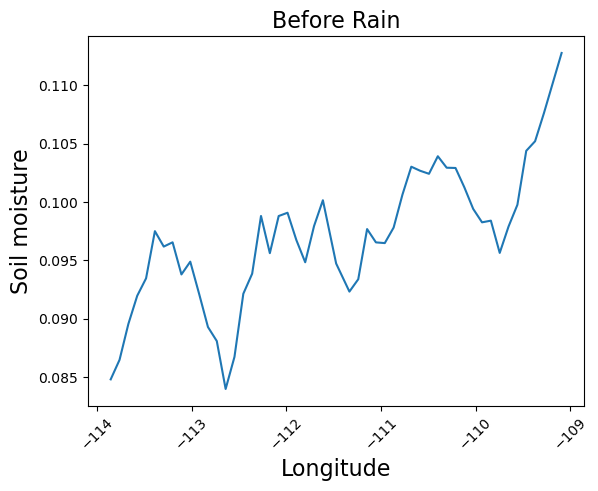

In [32]:
fig, ax = plt.subplots()
plt.plot(extracted_1000['Longitude'], extracted_1000['Soil_Moisture'])
#ax.xaxis.set_major_locator(md.MonthLocator())
#ax.xaxis.set_major_formatter(md.DateFormatter('%b %Y'))
plt.xticks(rotation=45) 
#n = 30  # Show every 30th label (adjust this as needed)
#plt.xticks(extracted['Date'])
ax.set_xlabel('Longitude', fontsize = 16)
ax.set_ylabel('Soil moisture', fontsize = 16)
ax.set_title('Before Rain', fontsize = 16)
#ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
#ax.xaxis.set_minor_locator(ticker.NullLocator())

Text(0.5, 1.0, 'Before Rain PM')

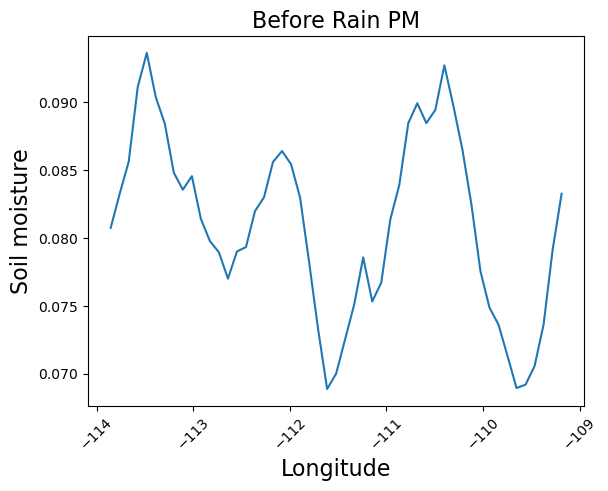

In [33]:
fig, ax = plt.subplots()
plt.plot(extractedd_1000['Longitude'], extractedd_1000['Soil_Moisture'])
#ax.xaxis.set_major_locator(md.MonthLocator())
#ax.xaxis.set_major_formatter(md.DateFormatter('%b %Y'))
plt.xticks(rotation=45) 
#n = 30  # Show every 30th label (adjust this as needed)
#plt.xticks(extracted['Date'])
ax.set_xlabel('Longitude', fontsize = 16)
ax.set_ylabel('Soil moisture', fontsize = 16)
ax.set_title('Before Rain PM', fontsize = 16)
#ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
#ax.xaxis.set_minor_locator(ticker.NullLocator())

Text(0.5, 1.0, 'AM')

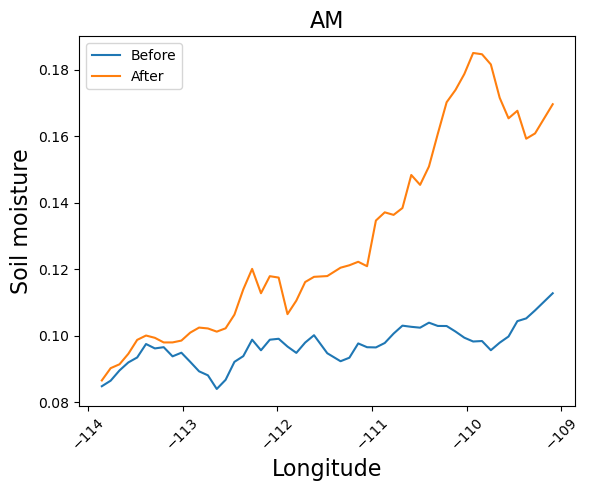

In [34]:
fig, ax = plt.subplots()
plt.plot(extracted_1000['Longitude'], extracted_1000['Soil_Moisture'], label = 'Before')
plt.plot(extracted_10002['Longitude'], extracted_10002['Soil_Moisture'], label = 'After')
#ax.xaxis.set_major_locator(md.MonthLocator())
#ax.xaxis.set_major_formatter(md.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.legend()
#n = 30  # Show every 30th label (adjust this as needed)
#plt.xticks(extracted['Date'])
ax.set_xlabel('Longitude', fontsize = 16)
ax.set_ylabel('Soil moisture', fontsize = 16)
ax.set_title('AM', fontsize = 16)
#ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
#ax.xaxis.set_minor_locator(ticker.NullLocator())

Text(0.5, 1.0, 'After Rain')

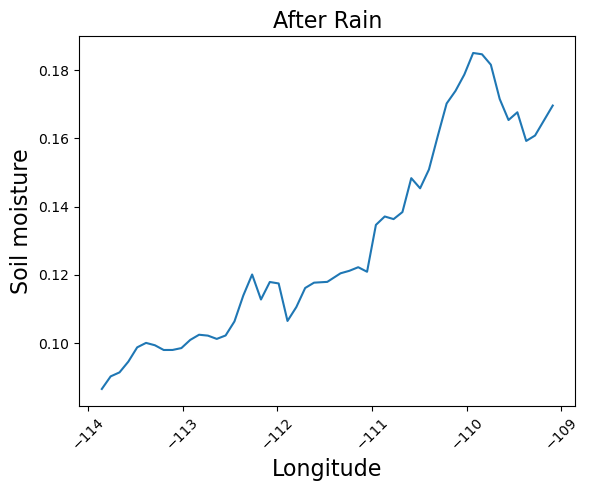

In [35]:
fig, ax = plt.subplots()
plt.plot(extracted_10002['Longitude'], extracted_10002['Soil_Moisture'])
#ax.xaxis.set_major_locator(md.MonthLocator())
#ax.xaxis.set_major_formatter(md.DateFormatter('%b %Y'))
plt.xticks(rotation=45) 
#n = 30  # Show every 30th label (adjust this as needed)
#plt.xticks(extracted['Date'])
ax.set_xlabel('Longitude', fontsize = 16)
ax.set_ylabel('Soil moisture', fontsize = 16)
ax.set_title('After Rain', fontsize = 16)
#ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
#ax.xaxis.set_minor_locator(ticker.NullLocator())

Text(0.5, 1.0, 'After Rain PM')

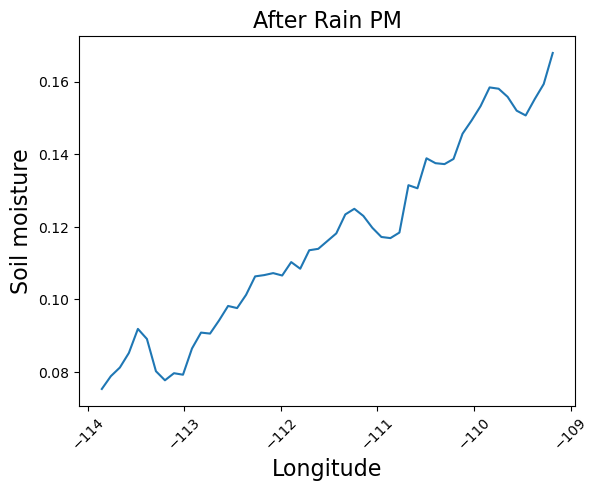

In [36]:
fig, ax = plt.subplots()
plt.plot(extractedd_10002['Longitude'], extractedd_10002['Soil_Moisture'])
#ax.xaxis.set_major_locator(md.MonthLocator())
#ax.xaxis.set_major_formatter(md.DateFormatter('%b %Y'))
plt.xticks(rotation=45) 
#n = 30  # Show every 30th label (adjust this as needed)
#plt.xticks(extracted['Date'])
ax.set_xlabel('Longitude', fontsize = 16)
ax.set_ylabel('Soil moisture', fontsize = 16)
ax.set_title('After Rain PM', fontsize = 16)
#ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
#ax.xaxis.set_minor_locator(ticker.NullLocator())

Text(0.5, 1.0, 'PM')

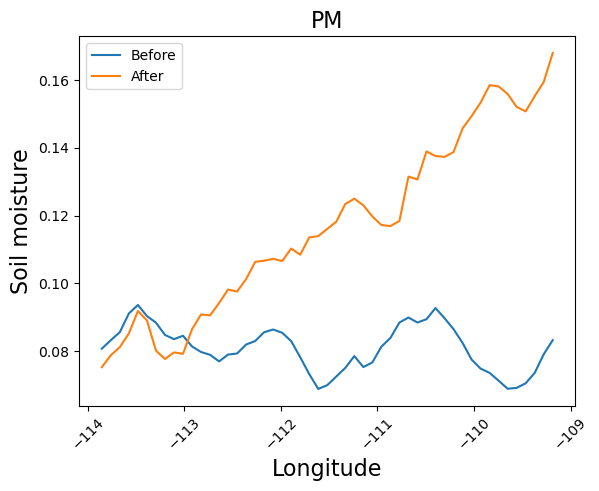

In [37]:
fig, ax = plt.subplots()
plt.plot(extractedd_1000['Longitude'], extractedd_1000['Soil_Moisture'], label = 'Before')
plt.plot(extractedd_10002['Longitude'], extractedd_10002['Soil_Moisture'], label = 'After')
#ax.xaxis.set_major_locator(md.MonthLocator())
#ax.xaxis.set_major_formatter(md.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.legend()
#n = 30  # Show every 30th label (adjust this as needed)
#plt.xticks(extracted['Date'])
ax.set_xlabel('Longitude', fontsize = 16)
ax.set_ylabel('Soil moisture', fontsize = 16)
ax.set_title('PM', fontsize = 16)
#ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
#ax.xaxis.set_minor_locator(ticker.NullLocator())

Text(0.5, 1.0, 'Before Rain AM vs PM')

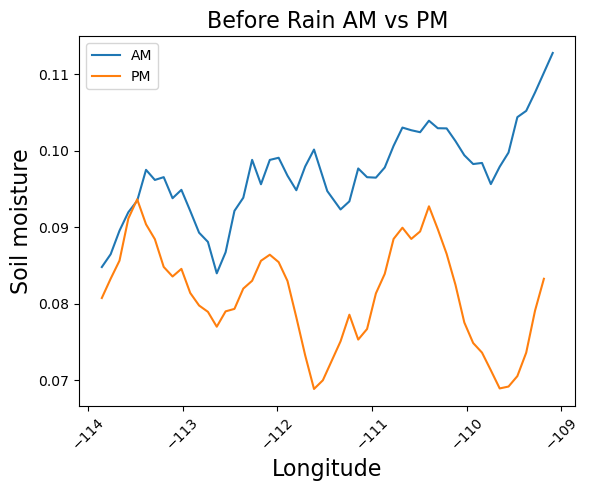

In [38]:
fig, ax = plt.subplots()
plt.plot(extracted_1000['Longitude'], extracted_1000['Soil_Moisture'], label = 'AM')
plt.plot(extractedd_1000['Longitude'], extractedd_1000['Soil_Moisture'], label = 'PM')
#ax.xaxis.set_major_locator(md.MonthLocator())
#ax.xaxis.set_major_formatter(md.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.legend()
#n = 30  # Show every 30th label (adjust this as needed)
#plt.xticks(extracted['Date'])
ax.set_xlabel('Longitude', fontsize = 16)
ax.set_ylabel('Soil moisture', fontsize = 16)
ax.set_title('Before Rain AM vs PM', fontsize = 16)
#ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
#ax.xaxis.set_minor_locator(ticker.NullLocator())

Text(0.5, 1.0, 'After Rain AM vs PM')

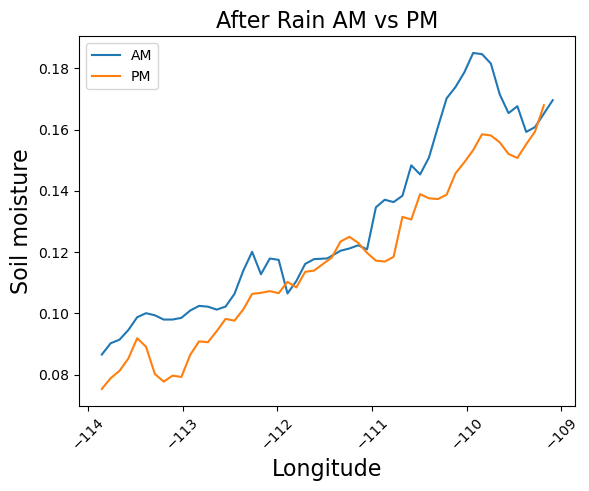

In [39]:
fig, ax = plt.subplots()
plt.plot(extracted_10002['Longitude'], extracted_10002['Soil_Moisture'], label = 'AM')
plt.plot(extractedd_10002['Longitude'], extractedd_10002['Soil_Moisture'], label = 'PM')
#ax.xaxis.set_major_locator(md.MonthLocator())
#ax.xaxis.set_major_formatter(md.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.legend()
#n = 30  # Show every 30th label (adjust this as needed)
#plt.xticks(extracted['Date'])
ax.set_xlabel('Longitude', fontsize = 16)
ax.set_ylabel('Soil moisture', fontsize = 16)
ax.set_title('After Rain AM vs PM', fontsize = 16)
#ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
#ax.xaxis.set_minor_locator(ticker.NullLocator())

In [40]:
merged_df_with_dates2 = pd.concat([dates_df, combined_merged_df_with_dates], axis=1)
merged_df_with_dates2 = merged_df_with_dates2.replace(-9999, np.NaN)
merged_df_with_dates2 = merged_df_with_dates2.dropna()
merged_df_with_dates2


Date   Latitude   Longitude  Latitude_centroid   
0        2023-09-08  84.656418 -179.953323          84.656418  \
1        2023-09-08  84.656418 -179.859955          84.656418   
2        2023-09-08  84.656418 -179.766602          84.656418   
3        2023-09-08  84.656418 -179.673233          84.656418   
4        2023-09-08  84.656418 -179.579880          84.656418   
...             ...        ...         ...                ...   
68883579 2023-09-18 -84.656418  179.579880         -84.656418   
68883580 2023-09-18 -84.656418  179.673233         -84.656418   
68883581 2023-09-18 -84.656418  179.766602         -84.656418   
68883582 2023-09-18 -84.656418  179.859955         -84.656418   
68883583 2023-09-18 -84.656418  179.953323         -84.656418   

          Longitude_centroid  retrieval  
0                -179.953323       15.0  
1                -179.859955       15.0  
2                -179.766602       15.0  
3                -179.673233       15.0  
4                -179.579880       15.0  
...                      ...        ...  
68883579          179.579880       15.0  
68883580          179.673233       15.0  
68883581          179.766602       15.0  
68883582          179.859955       15.0  
68883583          179.953323       15.0  

[34612056 rows x 6 columns]

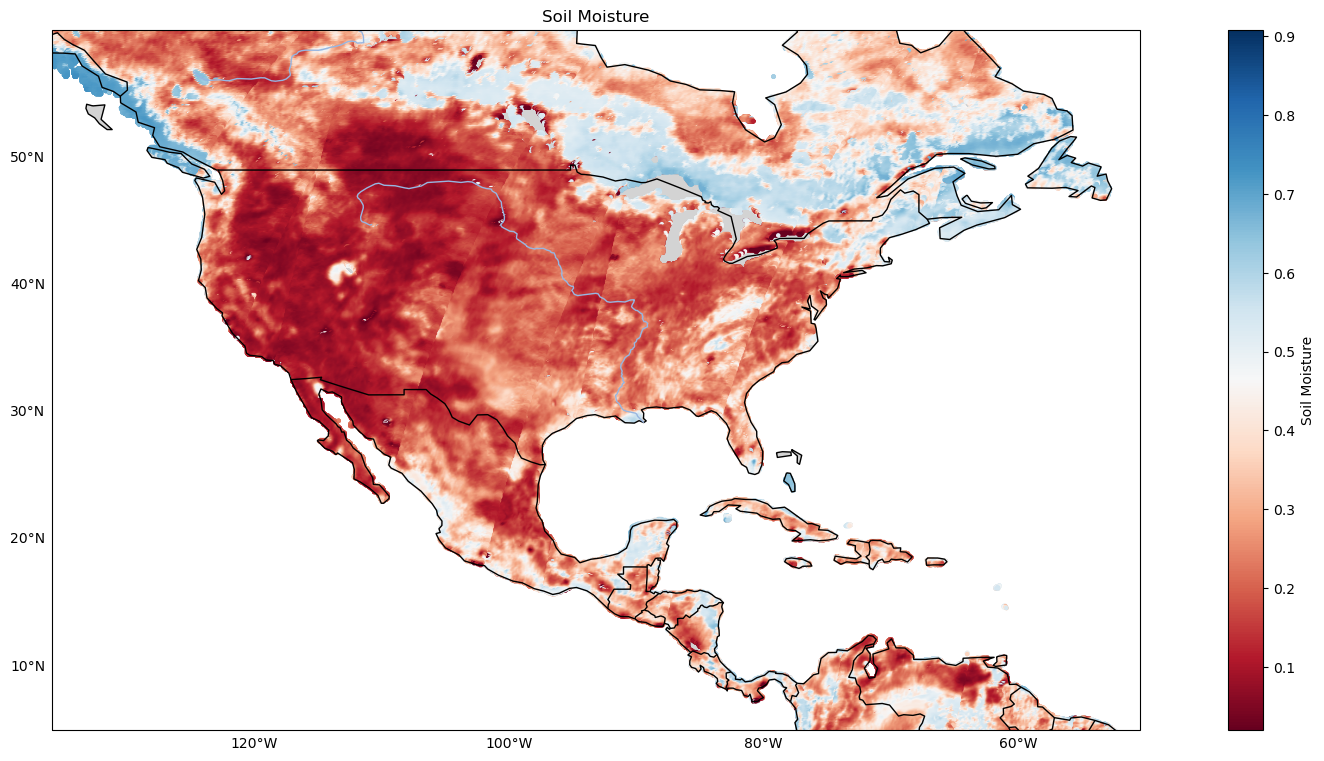

In [39]:
# Create a figure and an axes with a specific projection
fig = plt.figure(figsize=(50, 20))
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())

# Customize the map projection and extent
ax.set_extent([-135.9, -50.4, 5, 60], crs=ccrs.PlateCarree())
ax.coastlines()

# Add additional map features, such as rivers, borders, or land color
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Optionally, plot data or markers on the map
#plt.scatter(x, y, c=colors, cmap='RdBu', s=100)
sc = ax.scatter(merged_df_with_dates['Longitude'], merged_df_with_dates['Latitude'], c=merged_df_with_dates['Soil_Moisture'], cmap='RdBu', s=5, transform=ccrs.PlateCarree())
#ax.plot(traj_all2_subset['Longitude'], traj_all2_subset['Latitude'], c=traj_all2_subset['Launch_Altitude_AGL_m'], cmap='RdYlBu ', transform=ccrs.PlateCarree())  # Example marker
cbar = plt.colorbar(sc)
cbar.set_label('Soil Moisture')
# Set gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
# Add a star marker for a single point
# Set the title of the map
ax.set_title('Soil Moisture')

# Show the map
plt.show()

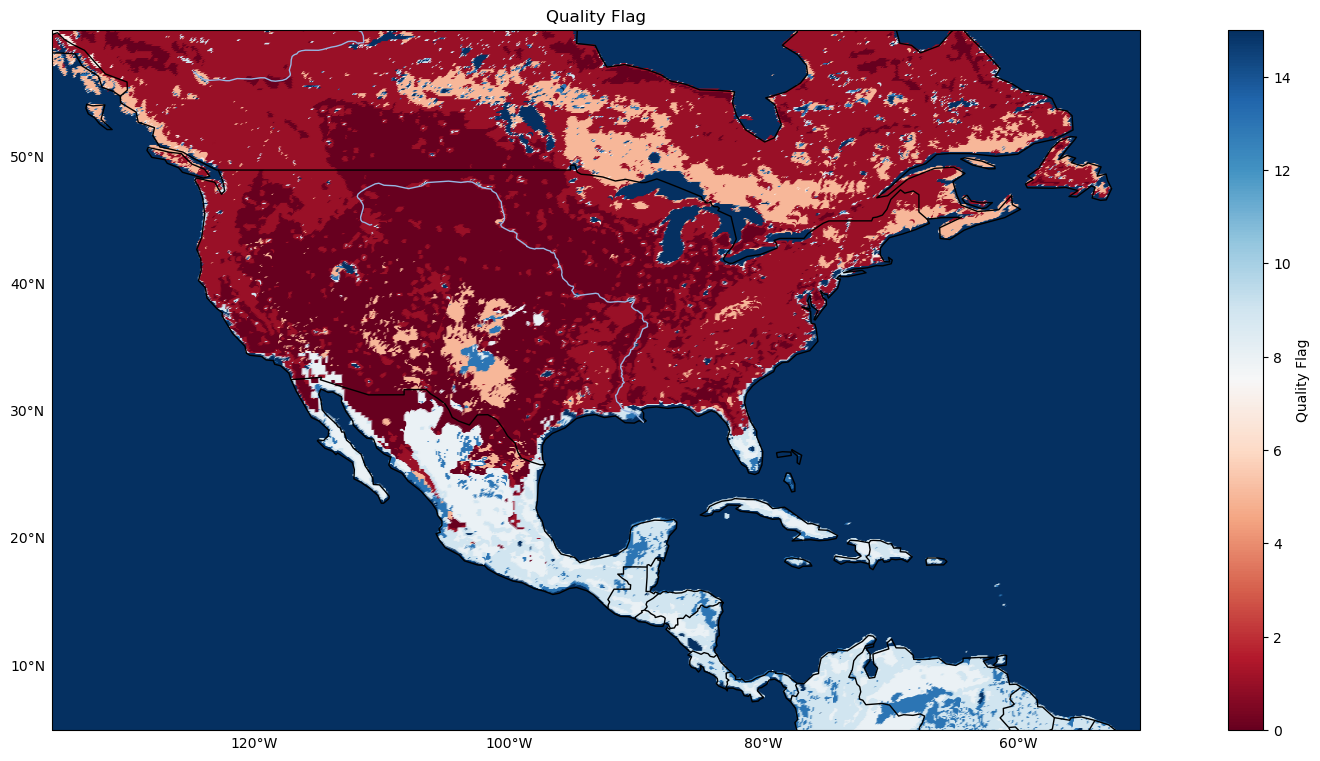

In [40]:
# Create a figure and an axes with a specific projection
fig = plt.figure(figsize=(50, 20))
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())

# Customize the map projection and extent
ax.set_extent([-135.9, -50.4, 5, 60], crs=ccrs.PlateCarree())
ax.coastlines()

# Add additional map features, such as rivers, borders, or land color
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Optionally, plot data or markers on the map
#plt.scatter(x, y, c=colors, cmap='RdYlGn', s=100)
sc = ax.scatter(combined_merged_df_with_dates['Longitude'], combined_merged_df_with_dates['Latitude'], c=combined_merged_df_with_dates['retrieval'], cmap='RdBu', s=5, transform=ccrs.PlateCarree())
#ax.plot(traj_all2_subset['Longitude'], traj_all2_subset['Latitude'], c=traj_all2_subset['Launch_Altitude_AGL_m'], cmap='RdYlBu ', transform=ccrs.PlateCarree())  # Example marker
cbar = plt.colorbar(sc)
cbar.set_label('Quality Flag')
# Set gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
# Add a star marker for a single point
# Set the title of the map
ax.set_title('Quality Flag')

# Show the map
plt.show()

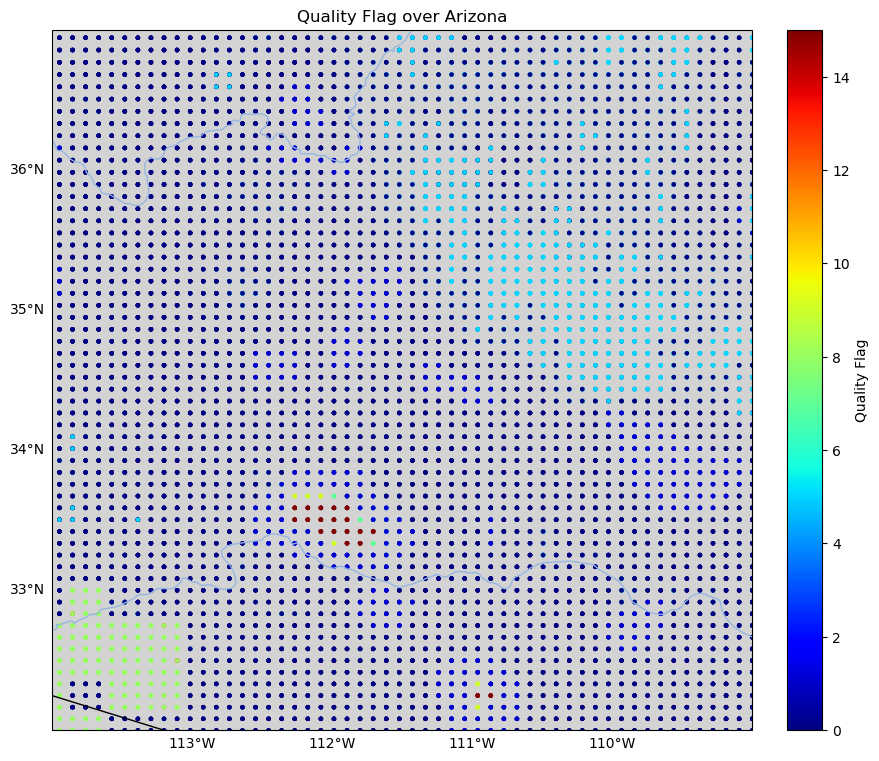

In [63]:
# Create a figure and an axes with a specific projection
fig = plt.figure(figsize=(50, 20))
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())

# Customize the map projection and extent
ax.set_extent([-114, -109, 32, 37], crs=ccrs.PlateCarree())
ax.coastlines()

# Add additional map features, such as rivers, borders, or land color
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Optionally, plot data or markers on the map
#plt.scatter(x, y, c=colors, cmap='RdYlGn', s=100)
sc = ax.scatter(combined_merged_df_with_dates['Longitude'], combined_merged_df_with_dates['Latitude'], c=combined_merged_df_with_dates['retrieval'], cmap='jet', s=5, transform=ccrs.PlateCarree())
#ax.plot(traj_all2_subset['Longitude'], traj_all2_subset['Latitude'], c=traj_all2_subset['Launch_Altitude_AGL_m'], cmap='RdYlBu ', transform=ccrs.PlateCarree())  # Example marker
cbar = plt.colorbar(sc, pad = 0.02)
cbar.set_label('Quality Flag')
# Set gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
# Add a star marker for a single point
# Set the title of the map
ax.set_title('Quality Flag over Arizona')

# Show the map
plt.show()

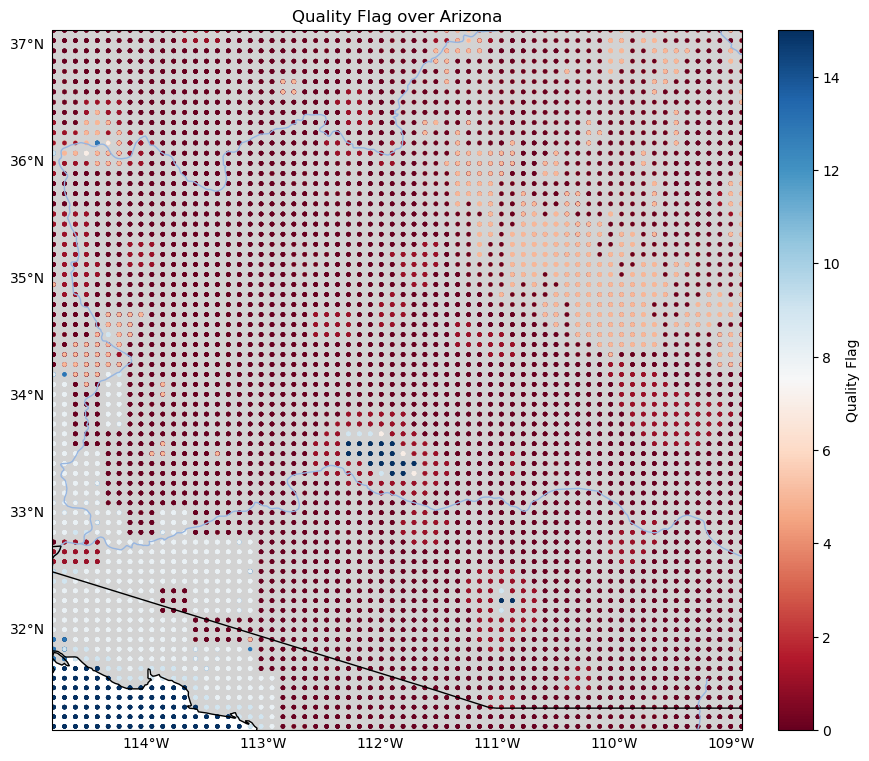

In [64]:
# Create a figure and an axes with a specific projection
fig = plt.figure(figsize=(50, 20))
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())

# Customize the map projection and extent
ax.set_extent([-114.8, -108.9, 31.14, 37.123], crs=ccrs.PlateCarree())
ax.coastlines()

# Add additional map features, such as rivers, borders, or land color
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Optionally, plot data or markers on the map
#plt.scatter(x, y, c=colors, cmap='RdYlGn', s=100)
sc = ax.scatter(combined_merged_df_with_dates['Longitude'], combined_merged_df_with_dates['Latitude'], c=combined_merged_df_with_dates['retrieval'], cmap='RdBu', s=5, transform=ccrs.PlateCarree())
#ax.plot(traj_all2_subset['Longitude'], traj_all2_subset['Latitude'], c=traj_all2_subset['Launch_Altitude_AGL_m'], cmap='RdYlBu ', transform=ccrs.PlateCarree())  # Example marker
cbar = plt.colorbar(sc, pad = 0.02)
cbar.set_label('Quality Flag')
# Set gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
# Add a star marker for a single point
# Set the title of the map
ax.set_title('Quality Flag over Arizona')

# Show the map
plt.show()

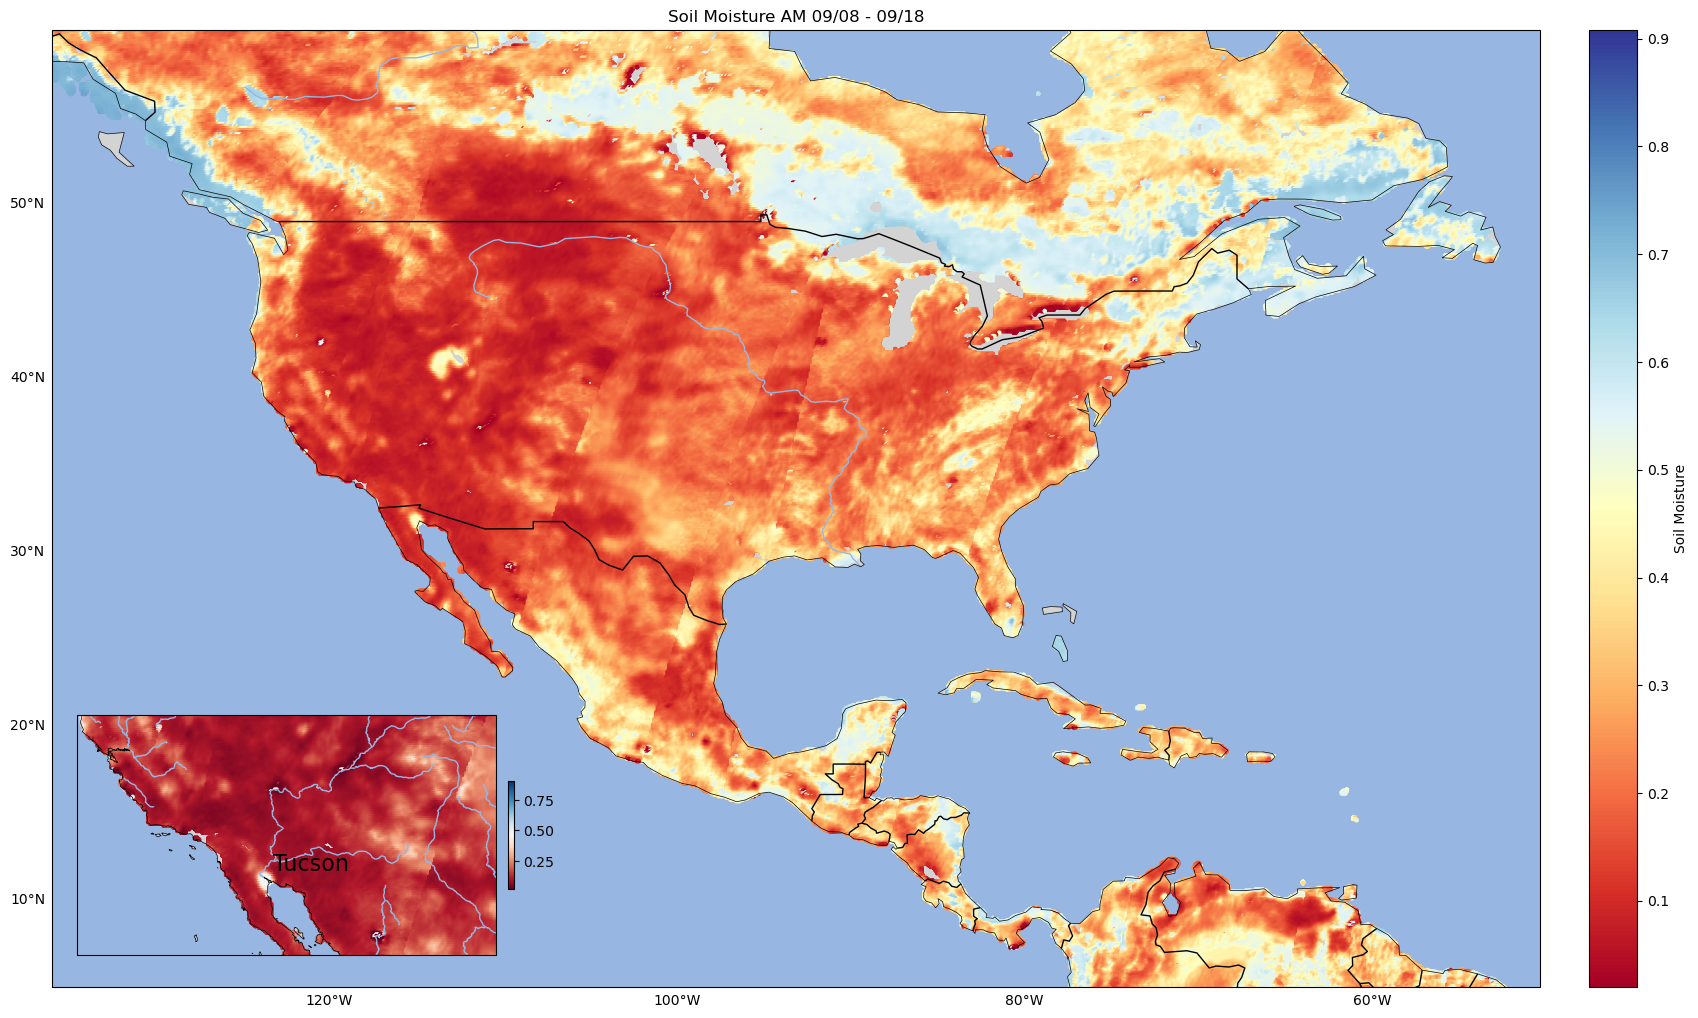

In [48]:

# Create a GeoDataFrame with sample data (latitude, longitude, label)
data = {
    'Latitude': [32.2540],
    'Longitude': [-110.9742],
    'Label': ['Tucson'],
}
fig = plt.figure(figsize=(50, 20))
# Create a map using Plate Carree projection
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.coastlines(resolution='110m', linewidth=0.5)

# Define the coordinates for the inset map's extent
inset_extent = [-124, -103.9, 28.23588, 39.73782]

# Create an inset_axes in the lower left corner of the main map
axins = plt.axes([0.106, 0.52, 0.12, 0.12], projection=ccrs.PlateCarree())

# Add land and coastlines to the inset map
axins.add_feature(cfeature.LAND, facecolor='lightgray')
axins.add_feature(cfeature.COASTLINE, linewidth=0.5)
# Add land and coastlines to the map
axins.add_feature(cfeature.RIVERS)
axins.add_feature(cfeature.OCEAN)

# Set the extent of the inset map to focus on Bermuda
axins.set_extent(inset_extent, crs=ccrs.PlateCarree())
norm = plt.Normalize(merged_df_with_dates['Soil_Moisture'].min(), merged_df_with_dates['Soil_Moisture'].max())
# Plot Tudor Hill on the main map
sc2 = axins.scatter(Arizonaa['Longitude'], Arizonaa['Latitude'], c=Arizonaa['Soil_Moisture'], cmap='RdBu', s=5, transform=ccrs.PlateCarree())
#sc2 = axins.plot(data['Longitude'], data['Latitude'], marker='*', color='black', s=100, transform=ccrs.PlateCarree())
# Plot each point with a color based on its altitude and add an edge color
sc = ax.scatter(merged_df_with_dates['Longitude'], merged_df_with_dates['Latitude'], c=merged_df_with_dates['Soil_Moisture'], cmap='RdYlBu', s=5, transform=ccrs.PlateCarree())
cmap = plt.get_cmap('RdBu')
#cmap = plt.get_cmap('RdYlBu ')

# Annotate the point with the name
for x, y, label in zip(data['Longitude'], data['Latitude'], data['Label']):
    plt.text(x, y, label, fontsize=16, ha='right', color='black', zorder = 50)

# Customize the map projection and extent
ax.set_extent([-135.9, -50.4, 5, 60], crs=ccrs.PlateCarree())

# Show gridlines with tick values on the x and y axes
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False

ax.set_xlabel('Longitude', fontsize=16)
ax.set_ylabel('Latitude', fontsize=16)
plt.xticks(fontsize=16)  # Set tick label size for x-axis
plt.yticks(fontsize=16)  # Set tick label size for y-axis
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', label='Soil Moisture', pad = 0.02)
cbar = plt.colorbar(sc2, ax=axins, orientation='vertical', pad = 0.02, shrink = 0.45)
cbar.set_label('', labelpad = 16, fontsize=16)
ax.tick_params(axis='both', labelsize=16)
ax.set_title('Soil Moisture AM 09/08 - 09/18')
plt.tight_layout()

# Show the map
plt.show()
